## Carlos Morán Alfonso y Carlos Tardón Rubio grupo 9

# Práctica 1C - Inteligencia Artificial
## Belén Díaz Agudo -  Facultad de Informática UCM
## Búsqueda local
En esta primera parte usaremos ejercicios paso a paso para familiarizarnos con la resolución de problemas sencillos de optimización, como la maximización o minimización de una función, o el problema de la mochila o del viajante, problemas conocidos cuya resolución se ha abordado con técnicas algorítmicas y que vamos a resolver utilizando algoritmos de búsqueda local. En la segunda parte de la práctica se pide resolver el problema de la organización de jornadas informáticas dado en el enunciado.

## Parte 1. Algoritmo de escalada
Hill Climbing es un algoritmo de búsqueda local heurística utilizada para problemas de optimización.
Esta solución puede o no ser el óptimo global. El algoritmo es una variante del algoritmo de generación y prueba.
<br>
En general, el algoritmo funciona de la siguiente manera:
- Evaluar el estado inicial.
- Si es igual al estado del objetivo, terminamos.
- Encuentra un estado vecino al estado actual
- Evaluar este estado. Si está más cerca del estado objetivo que antes, reemplace el estado inicial con este estado y repita estos pasos.
<br>
Usaremos la implementación de AIMA que está en el módulo search.py

    def hill_climbing(problem):
        """From the initial node, keep choosing the neighbor with highest value,
        stopping when no neighbor is better. [Figure 4.2]"""
        current = Node(problem.initial)
        while True:
            neighbors = current.expand(problem)
            if not neighbors:
                break
            neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
            if problem.value(neighbor.state) <= problem.value(current.state):
                break
            current = neighbor
        return current.state


### TSP (Travelling Salesman Problem): el problema del viajante
Dado un conjunto de ciudades y la distancia entre cada par de ciudades, el problema es encontrar la ruta más corta posible que visite cada ciudad exactamente una vez y regrese al punto de partida. Es un problema NP hard. No existen una solución de coste polinomial. 

In [1]:
##Resolvereremos el problema del viajante TSP para encontrar una solución aproximada.
from search import *

class TSP_problem(Problem):

    def two_opt(self, state):
        """ Neighbour generating function for Traveling Salesman Problem """
        neighbour_state = state[:]
        left = random.randint(0, len(neighbour_state) - 1)
        right = random.randint(0, len(neighbour_state) - 1)
        if left > right:
            left, right = right, left
        neighbour_state[left: right + 1] = reversed(neighbour_state[left: right + 1])
        return neighbour_state

    def actions(self, state):
        """ action that can be excuted in given state """
        return [self.two_opt]

    def result(self, state, action):
        """  result after applying the given action on the given state """
        return action(state)

    def path_cost(self, c, state1, action, state2):
        """ total distance for the Traveling Salesman to be covered if in state2  """
        cost = 0
        for i in range(len(state2) - 1):
            cost += distances[state2[i]][state2[i + 1]]
        cost += distances[state2[0]][state2[-1]]
        return cost

    def value(self, state):
        """ value of path cost given negative for the given state """
        return -1 * self.path_cost(None, None, None, state)

In [181]:
## Resolveremos el TSP para las ciudades de la lista de ciudades de Rumanía.
## ['Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Rimnicu', 'Sibiu', 'Timisoara', 'Urziceni', 'Vaslui', 'Zerind']

In [2]:
# Usaremos la siguiente representacion del libro AIMA para el mapa de Rumanía.
romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142)))

romania_map.locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))

Es bastante sencillo entender este `romania_map`. El primer nodo ** Arad ** tiene tres vecinos llamados ** Zerind **, ** Sibiu **, ** Timisoara **. Cada uno de estos nodos son 75, 140, 118 unidades aparte de ** Arad ** respectivamente. Y lo mismo ocurre con otros nodos.

Y `romania_map.locations` contiene las posiciones de cada uno de los nodos. 
Como heurística se puede usar la distancia en línea recta o la distancia manhattan (que es diferente de la proporcionada en `romania_map`) entre dos ciudades.

In [3]:
romania_locations = romania_map.locations
print(romania_locations)

{'Arad': (91, 492), 'Bucharest': (400, 327), 'Craiova': (253, 288), 'Drobeta': (165, 299), 'Eforie': (562, 293), 'Fagaras': (305, 449), 'Giurgiu': (375, 270), 'Hirsova': (534, 350), 'Iasi': (473, 506), 'Lugoj': (165, 379), 'Mehadia': (168, 339), 'Neamt': (406, 537), 'Oradea': (131, 571), 'Pitesti': (320, 368), 'Rimnicu': (233, 410), 'Sibiu': (207, 457), 'Timisoara': (94, 410), 'Urziceni': (456, 350), 'Vaslui': (509, 444), 'Zerind': (108, 531)}


In [4]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in romania_map.locations.keys()}
node_positions = romania_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in romania_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in romania_map.graph_dict.items() for k2, v2 in v.items()}

romania_graph_data = {  'graph_dict' : romania_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

In [5]:
from IPython.display import HTML
from IPython.display import display
from PIL import Image
from matplotlib import lines
import ipywidgets as widgets
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [186]:
def show_map(graph_data, node_colors=None):
    G = nx.Graph(graph_data['graph_dict'])
    node_colors = node_colors or graph_data['node_colors']
    node_positions = graph_data['node_positions']
    node_label_pos = graph_data['node_label_positions']
    edge_weights = graph_data['edge_weights']

    # set the size of the plot
    plt.figure(figsize=(18, 13))
    # draw the graph (both nodes and edges) with locations from romania_locations
    nx.draw(G, pos={k: node_positions[k] for k in G.nodes()},
            node_color=[node_colors[node] for node in G.nodes()], linewidths=0.3, edgecolors='k')

    # draw labels for nodes
    node_label_handles = nx.draw_networkx_labels(G, pos=node_label_pos, font_size=14)

    # add a white bounding box behind the node labels
    [label.set_bbox(dict(facecolor='white', edgecolor='none')) for label in node_label_handles.values()]

    # add edge lables to the graph
    nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=edge_weights, font_size=14)

    # add a legend
    white_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="white")
    orange_circle = lines.Line2D([], [], color="orange", marker='o', markersize=15, markerfacecolor="orange")
    red_circle = lines.Line2D([], [], color="red", marker='o', markersize=15, markerfacecolor="red")
    gray_circle = lines.Line2D([], [], color="gray", marker='o', markersize=15, markerfacecolor="gray")
    green_circle = lines.Line2D([], [], color="green", marker='o', markersize=15, markerfacecolor="green")
    plt.legend((white_circle, orange_circle, red_circle, gray_circle, green_circle),
               ('Un-explored', 'Frontier', 'Currently Exploring', 'Explored', 'Final Solution'),
               numpoints=1, prop={'size': 16}, loc=(.8, .75))

    # show the plot. No need to use in notebooks. nx.draw will show the graph itself.
    plt.show()

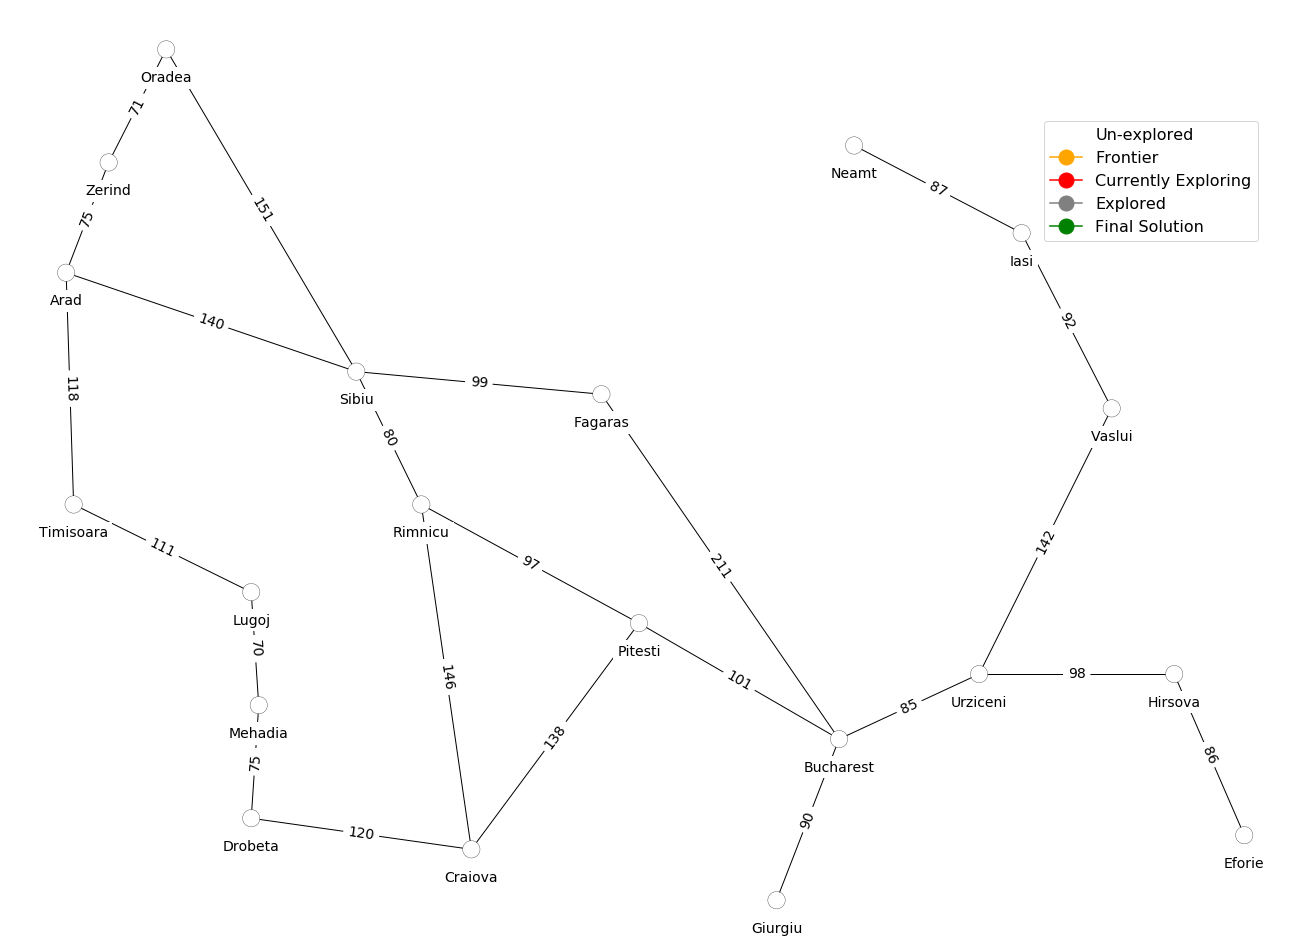

In [187]:
show_map(romania_graph_data)

In [5]:
##from notebook import show_map
##show_map(romania_graph_data)

In [6]:
## el siguiente código crea un diccionario y calcula y añade al diccionario la distancia manhattan entre las ciudades. 
import numpy as np

distances = {}
all_cities = []

for city in romania_map.locations.keys():
    distances[city] = {}
    all_cities.append(city)
    
all_cities.sort()
print(all_cities)

for name_1, coordinates_1 in romania_map.locations.items():
        for name_2, coordinates_2 in romania_map.locations.items():
            distances[name_1][name_2] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])
            distances[name_2][name_1] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])

['Arad', 'Bucharest', 'Craiova', 'Drobeta', 'Eforie', 'Fagaras', 'Giurgiu', 'Hirsova', 'Iasi', 'Lugoj', 'Mehadia', 'Neamt', 'Oradea', 'Pitesti', 'Rimnicu', 'Sibiu', 'Timisoara', 'Urziceni', 'Vaslui', 'Zerind']


In [15]:
# Creamos una instancia del problema TSP con la lista de ciudades anterior que se na extraido del mapa.
# En el mapa hay informacion de las distancias que se utilizan en la clase TSP_problem para calcular el coste y las heurísticas.
tsp = TSP_problem(all_cities)

-4264.1914235182


In [7]:
## Redefinimos el hill climbing de AIMA para que el método de generacion de vecinos sea acceder al grafo que hemos definido para el TSP

def hill_climbing(problem):
    
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    
    def find_neighbors(state, number_of_neighbors=100):
        """ finds neighbors using two_opt method """
        
        neighbors = []
        
        for i in range(number_of_neighbors):
            new_state = problem.two_opt(state)
            neighbors.append(Node(new_state))
            state = new_state
            
        return neighbors

    # as this is a stochastic algorithm, we will set a cap on the number of iterations
    iterations = 10000
    
    current = Node(problem.initial)
    while iterations:
        neighbors = find_neighbors(current.state)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) >= problem.value(current.state):
            current.state = neighbor.state
        iterations -= 1
    print(f"Value: {problem.value(current.state)}")
    return current.state

In [34]:
# Y lo resolvemos con escalada. 
print(hill_climbing(tsp))

Value: -1589.8433308050926
['Oradea', 'Zerind', 'Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Drobeta', 'Craiova', 'Pitesti', 'Giurgiu', 'Bucharest', 'Urziceni', 'Eforie', 'Hirsova', 'Vaslui', 'Iasi', 'Neamt', 'Fagaras', 'Rimnicu', 'Sibiu']


In [30]:
print(hill_climbing(tsp))

Value: -1589.8433308050924
['Drobeta', 'Craiova', 'Pitesti', 'Giurgiu', 'Bucharest', 'Urziceni', 'Eforie', 'Hirsova', 'Vaslui', 'Iasi', 'Neamt', 'Fagaras', 'Rimnicu', 'Sibiu', 'Oradea', 'Zerind', 'Arad', 'Timisoara', 'Lugoj', 'Mehadia']


In [31]:
print(hill_climbing(tsp))

Value: -1589.8433308050924
['Mehadia', 'Drobeta', 'Craiova', 'Pitesti', 'Giurgiu', 'Bucharest', 'Urziceni', 'Eforie', 'Hirsova', 'Vaslui', 'Iasi', 'Neamt', 'Fagaras', 'Rimnicu', 'Sibiu', 'Oradea', 'Zerind', 'Arad', 'Timisoara', 'Lugoj']


In [33]:
%%timeit
hill_climbing(tsp)

Value: -1593.5354259584917
Value: -1589.8433308050924
Value: -1593.5354259584917
Value: -1593.5354259584917
Value: -1684.4204383087335
Value: -1684.4204383087335
Value: -1589.8433308050924
Value: -1593.5354259584917
14.9 s ± 1.25 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
##Nota: Esta implementación es un intento de implementación distinta para intentar comparar el 
# algortimo que nos dan con los vistos anteriormente. Al final no nos funcionó y está incompleto

import operator as op
import functools as funct

class TSP_ad_hoc(Problem):

    def __init__(self, cities, distances):
        self.cities = cities
        self.distances = distances
        self.initial = (tuple([False for i in range(0,len(self.cities))]),0,"",())

    def actions(self, state):
        return tuple([i for i in range(0,len(self.cities)) if not state[0][i]])

    def result(self, state, action):
        new_cities = list(state[0])
        new_visited = list(state[3])
        new_cities[action] = True
        new_visited.append(self.cities[action])
        new_cost = state[1]
        if state[2] != "":
            new_cost = new_cost + self.distances[state[2]][self.cities[action]] 
        return (tuple(new_cities),new_cost,self.cities[action],tuple(new_visited))
    
    def goal_test(self,state):
        return len(state[3]) == len(self.cities)

### Ejercicio 1. Resuelve el problema TSP con el algoritmo de escalada por máxima pendiente en el mapa de ciudades de Rumanía y explica el resultado obtenido. 

Realiza un análisis razonado de las propiedades del algoritmo: eficiencia y optimalidad en base a la ejecución.  
   
El algoritmo no es óptimo. Prueba de ello es que una ejecución del algoritmo devolvió la solución:  
['Fagaras', 'Neamt', 'Iasi', 'Vaslui', 'Hirsova', 'Eforie', 'Urziceni', 'Bucharest', 'Giurgiu', 'Craiova', 'Drobeta', 'Mehadia', 'Lugoj', 'Timisoara', 'Arad', 'Zerind', 'Oradea', 'Sibiu', 'Rimnicu', 'Pitesti']
de coste 1593.53, y la siguiente ejecución:  
['Drobeta', 'Craiova', 'Pitesti', 'Giurgiu', 'Bucharest', 'Urziceni', 'Eforie', 'Hirsova', 'Vaslui', 'Iasi', 'Neamt', 'Fagaras', 'Rimnicu', 'Sibiu', 'Oradea', 'Zerind', 'Arad', 'Timisoara', 'Lugoj', 'Mehadia']
de coste 1589.84, que es menor que la primera ejecución(y por tanto, la primera ejecución no devolvió una solución óptima). De hecho, la ruta más corta que hemos encontrado hasta ahora tiene longitud 1589.84 (es un minimo, puede ser el global o uno local)

En cuanto a la eficiencia, como se observa en la implementación, el algoritmo de escalada por máxima pendiente es más eficiente en memoria que los algoritmos vistos hasta ahora, pues como mucho tenemos number_of_neighbors estados guardados a la vez en memoria(por defecto 100). Con respecto a la complejidad en tiempo, de media tarda 14.6 segundos en llegar a una solución. Pese a que el espacio de búsqueda tiene n! estados (donde n=20 es el número de ciudades), tenemos una cota superior del número de iteraciones que se van a dar, así que nunca se recorrerán todos los estados.

Para ver si ha encontrado el óptimo global, vamos a probar con distintos estados iniciales aleatorios, y ejecutamos el algoritmo sobre ellos

In [18]:
import random
random.shuffle(all_cities)
print(all_cities)

['Vaslui', 'Pitesti', 'Iasi', 'Craiova', 'Fagaras', 'Zerind', 'Giurgiu', 'Hirsova', 'Neamt', 'Rimnicu', 'Mehadia', 'Lugoj', 'Urziceni', 'Timisoara', 'Sibiu', 'Oradea', 'Eforie', 'Drobeta', 'Arad', 'Bucharest']


In [20]:
%%timeit
random.shuffle(all_cities)
tsp = TSP_problem(all_cities)
hill_climbing(tsp)

Value: -1589.8433308050924
Value: -1589.8433308050924
Value: -1589.8433308050924
Value: -1589.8433308050924
Value: -1589.8433308050924
Value: -1589.8433308050924
Value: -1593.5354259584917
Value: -1593.5354259584917
12.4 s ± 817 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Según se ve, desde estados iniciales aleatorios no se llega a una solucion de coste menor a 1589.8533308050924, por lo que podemos escoger como candidato a solución global:

['Mehadia', 'Drobeta', 'Craiova', 'Pitesti', 'Giurgiu', 'Bucharest', 'Urziceni', 'Eforie', 'Hirsova', 'Vaslui', 'Iasi', 'Neamt', 'Fagaras', 'Rimnicu', 'Sibiu', 'Oradea', 'Zerind', 'Arad', 'Timisoara', 'Lugoj']
De coste: 1589.8433308050924  

El algoritmo ha encontrado(salvo permutación cíclica) la misma solución en varias iteraciones. Muestra de ello:  
['Drobeta', 'Craiova', 'Pitesti', 'Giurgiu', 'Bucharest', 'Urziceni', 'Eforie', 'Hirsova', 'Vaslui', 'Iasi', 'Neamt', 'Fagaras', 'Rimnicu', 'Sibiu', 'Oradea', 'Zerind', 'Arad', 'Timisoara', 'Lugoj', 'Mehadia']  
con valor 1589.8433308050924  
['Mehadia', 'Drobeta', 'Craiova', 'Pitesti', 'Giurgiu', 'Bucharest', 'Urziceni', 'Eforie', 'Hirsova', 'Vaslui', 'Iasi', 'Neamt', 'Fagaras', 'Rimnicu', 'Sibiu', 'Oradea', 'Zerind', 'Arad', 'Timisoara', 'Lugoj']  
con valor 1589.8433308050924   
Que son soluciones equivalentes(la ciudad inicial es distinta, pero se recorren en el mismo orden)  

Para compararlo con los algoritmos de búsqueda exhaustiva, hay que darse cuenta de que las posibles soluciones son las permutaciones de la lista de ciudades, así que bastaría implementar una búsqueda exhaustiva que genere todas esas permutaciones. Como ese espacio tiene n! estados, lo suyo sería buscar una heurística y usar astar. Esto, al contrario que hill climbing, garantizaría el determinismo de la solución que proporciona el algoritmo.


## Parte 2. Enfriamiento simulado ( simulated annealing) 
El algoritmo de enfriamiento simulado puede manejar las situaciones de óptimo local o mesetas típicas en algoritmos de escalada.
<br>
El enfriamiento simulado es bastante similar a la escalada pero en lugar de elegir el mejor movimiento en cada iteración, elige un movimiento aleatorio. Si este movimiento aleatorio nos acerca al óptimo global, será aceptado,
pero si no lo hace, el algoritmo puede aceptar o rechazar el movimiento en función de una probabilidad dictada por la temperatura.  Cuando la `temperatura` es alta, es más probable que el algoritmo acepte un movimiento aleatorio incluso si es malo. A bajas temperaturas, solo se aceptan buenos movimientos, con alguna excepción ocasional.
Esto permite la exploración del espacio de estado y evita que el algoritmo se atasque en el óptimo local.

    Usaremos la implementación de AIMA del modulo search.py
    
    def simulated_annealing(problem, schedule=exp_schedule()):
    """[Figure 4.5] CAUTION: This differs from the pseudocode as it
    returns a state instead of a Node."""
    current = Node(problem.initial)
    for t in range(sys.maxsize):
        T = schedule(t)
        if T == 0:
            return current.state
        neighbors = current.expand(problem)
        if not neighbors:
            return current.state
        next_choice = random.choice(neighbors)
        delta_e = problem.value(next_choice.state) - problem.value(current.state)
        if delta_e > 0 or probability(math.exp(delta_e / T)):
            current = next_choice

Como hemos visto en clase hay varios métodos de enfriamiento (scheduling routine) 
Se puede variar el método de enfriamiento. En la implementación actual estamos usando el método de enfriamiento exponencial (que se pasa como parámetro). 

    def exp_schedule(k=20, lam=0.005, limit=100):
        """One possible schedule function for simulated annealing"""
        return lambda t: (k * math.exp(-lam * t) if t < limit else 0)

Como ejemplo, vamos a definir un problema sencillo de encontrar el punto más alto en una rejilla. Este problema está definido en el módulo search.py como PeakFindingProblem. Lo reproducimos aquí y creamos una rejilla simple.

In [42]:
initial = (0, 0)
grid = [[3, 7, 2, 8], [5, 2, 9, 1], [5, 3, 3, 1]]

In [6]:
# Pre-defined actions for PeakFindingProblem
directions4 = { 'W':(-1, 0), 'N':(0, 1), 'E':(1, 0), 'S':(0, -1) }
directions8 = dict(directions4) 
directions8.update({'NW':(-1, 1), 'NE':(1, 1), 'SE':(1, -1), 'SW':(-1, -1) })

class PeakFindingProblem(Problem):
    """Problem of finding the highest peak in a limited grid"""

    def __init__(self, initial, grid, defined_actions=directions4):
        """The grid is a 2 dimensional array/list whose state is specified by tuple of indices"""
        Problem.__init__(self, initial)
        self.grid = grid
        self.defined_actions = defined_actions
        self.n = len(grid)
        assert self.n > 0
        self.m = len(grid[0])
        assert self.m > 0

    def actions(self, state):
        """Returns the list of actions which are allowed to be taken from the given state"""
        allowed_actions = []
        for action in self.defined_actions:
            next_state = vector_add(state, self.defined_actions[action])
            if next_state[0] >= 0 and next_state[1] >= 0 and next_state[0] <= self.n - 1 and next_state[1] <= self.m - 1:
                allowed_actions.append(action)

        return allowed_actions

    def result(self, state, action):
        """Moves in the direction specified by action"""
        return vector_add(state, self.defined_actions[action])

    def value(self, state):
        """Value of a state is the value it is the index to"""
        x, y = state
        assert 0 <= x < self.n
        assert 0 <= y < self.m
        return self.grid[x][y]


In [24]:
problem = PeakFindingProblem(initial, grid, directions4)

In [11]:
# Lo resolvemos con enfriamiento simulado

solutions = [problem.value(simulated_annealing(problem)) for i in range(100)]
max(solutions)

9

In [12]:
def hill_climbing(problem):
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    current = Node(problem.initial)
    while True:
        neighbors = current.expand(problem)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,
                                     key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            break
        current = neighbor
    return current.state

In [25]:
solution = problem.value(hill_climbing(problem))
solution

7

### Ejercicio 2.  Resuelve el problema anterior de encontrar el punto máximo en una rejilla. Comenta y razona los resultados obtenidos en distintas rejjillas con los algoritmos de enfriamiento simulado y escalada por máxima pendiente. 

Como hemos visto en el primer grid, el algoritmo de enfriamiento simulado encuentra el maximo global, sin quedarse estancado en un máximo local. Esto se debe gracias al componente aleatorio del algoritmo, lo cual permite escoger movimientos que, si bien al principio empeoran la solución, después permiten llegar al máximo global. Sin embargo, el algoritmo de hill climbing se queda estancado en un máximo local(el 7). Podría solucionarse empezando desde varios puntos escogidos aleatoriamente, ejecutar un hill climbing desde cada uno de ellos y quedarse con el maximo(aunque esto no asegura hallar el maximo global):

In [74]:
def random_grid_hill_climbing(grid, s=100):
    current = grid[0][0] ## solucion actual.
    for i in range(0,s):
        initial = (random.randrange(len(grid)),random.randrange(len(grid[0])))
        problem = PeakFindingProblem(initial, grid, directions4)
        val = problem.value(hill_climbing(problem))
        current = max(val, current)
    return current

In [43]:
random_grid_hill_climbing(grid)

9

In [44]:
## Probemos con otra rejilla
grid = [[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.40, 0.40, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 11.2, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]
problem = PeakFindingProblem(initial, grid, directions4)

In [45]:
solutions = [problem.value(simulated_annealing(problem)) for i in range(100)]
max(solutions)

11.2

In [46]:
solution = problem.value(hill_climbing(problem))
solution

0.0

Como vemos, enfriamiento simulado ha conseguido llegar al óptimo global (11.2), mientras que en hill climbing, con la celda de prueba vemos que no alcanzamos en ningún caso la solución porque la celda (0,0) (donde comenzamos) es una meseta. El algoritmo empieza y acaba en la misma celda. Algo parecido ocurre con la primera celda de prueba,[[3, 7, 2, 8], [5, 2, 9, 1], [5, 3, 3, 1]]. En ese caso hill_climbing siempre devuelve el 7 por ser un mínimo local y nunca llega al 9.  

Con simulated_annealing cabamos alcanzando en ambos casos la solución. En esto ayuda que estamos ejecutando el algoritmo más de una vez para ambas rejillas, teniendo así más posibilidades de avanzar por la rejilla y encontrar el verdadero máximo y no un máximo local. Conviene resaltar que para las dos celdas de ejemplo dadas (especialmente en el caso de la segunda) nos interesa empezar con la temperatura razonablemente caliente.  

Veamos qué tal se comporta hill climbing con puntos de inicio aleatorios:

In [48]:
random_grid_hill_climbing(grid)

11.2

Como hemos visto, random_grid_hill_climbing también consigue llegar al máximo global. Esto tampoco es sorprendente, pues el algoritmo escoge aleatoriamente 100 puntos de inicio, y la rejilla de pruebas tiene 12x9 = 108 puntos. Para comparar su eficacia, habría que usar rejillas mucho más amplias

In [83]:
grid = [[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.40, 0.40, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.40, 0.40, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 8.00, 11.2, 9.70, 1.40],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 10.2, 0.70, 1.40, 1.80, 0.70, 0.00, 0.00, 9.00, 10.00, 0.00, 0.00],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00]]
problem = PeakFindingProblem((0,0), grid, directions4)

In [81]:
# En contadas ocasiones, no encuentra el máximo global. El iniciar en un punto fijo supone un agravio comparativo
# con respecto a random_grid_hill_climbing
solutions = [problem.value(simulated_annealing(problem)) for i in range(100)]
max(solutions)

10.2

In [84]:
# Pese a ser un algoritmo que parte de hill_climbing, en casi todas las ejecuciones encuentra el máximo global,
# con tan solo 20 puntos iniciales escogidos aleatoriamente, lo que muestra que es recomendable introducir 
#aleatoriedad en el punto de inicio
random_grid_hill_climbing(grid,20)

11.2

In [193]:
# Un último ejemplo. El máximo (1000) está en la celda más alejada del origen
grid = [[0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.40, 0.40, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.40, 0.40, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 8.00, 11.2, 9.70, 1.40],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 10.2, 0.70, 1.40, 1.80, 0.70, 0.00, 0.00, 9.00, 10.00, 0.00, 0.00],
        [2.20, 1.80, 0.70, 0.00, 0.00, 9.00, 0.00, 0.00, 0.00, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [2.20, 1.80, 4.70, 6.50, 4.30, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.70, 1.40, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [2.20, 1.80, 0.70, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00],
        [2.20, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 0.00, 1.80, 4.70, 8.50, 4.30, 1.80, 0.70, 0.00, 1000.00]]
problem = PeakFindingProblem((0,0), grid, directions8)

In [198]:
solutions = [problem.value(simulated_annealing(problem)) for i in range(100)]
max(solutions)

1000.0

In [133]:
random_grid_hill_climbing(grid,100)

11.2

Se ve una gran diferencia usando directions8, pues al poder tomar más caminos, con directions8 las 100 ejecuciones de simulated_annealing son suficientes para llegar al máximo global 1000.00. En este caso, para que hill_climbing llegara a la solución en casi todas las ejecuciones de random_grid_hill_climbing, ha sido necesario poner 100 puntos iniciales escogidos aleatoriamente. Como la rejilla es de 204, esto demuestra la limitación de random_grid_hill_climbing, y por tanto de hill_climbing.  
Combinando estas ideas, podemos hacer algo similar para simulated_annealing:

In [207]:
def random_simulated_annealing(grid, s=100):
    current = grid[0][0] ## solucion actual.
    for i in range(0,s):
        initial = (random.randrange(len(grid)),random.randrange(len(grid[0])))
        problem = PeakFindingProblem(initial, grid, directions8)
        val = problem.value(simulated_annealing(problem))
        current = max(val, current)
    return current

In [211]:
## Llega a la solución en prácticamente la totalidad de las ejecuciones, y esta rejilla
## tan solo requiere de 25 puntos iniciales.
random_simulated_annealing(grid,s=25)

1000.0

## Parte 3. Algoritmos genéticos


Se define una clase ProblemaGenetico que incluye los elementos necesarios para la representación de un problema de optimización que se va a resolver con un algoritmo genético. Los elementos son los que hemos visto en clase:

 - genes: lista de genes usados en el genotipo de los estados.
 - longitud_individuos: longitud de los cromosomas
 - decodifica: función de obtiene el fenotipo a partir del genotipo.
 - fitness: función de valoración.
 - muta: función de mutación de un cromosoma 
 - cruza: función de cruce de un par de cromosomas

In [6]:
import random

In [7]:
class ProblemaGenetico(object):
        def __init__(self, genes,fun_dec,fun_muta , fun_cruza, fun_fitness,longitud_individuos):
            self.genes = genes
            self.fun_dec = fun_dec
            self.fun_cruza = fun_cruza
            self.fun_muta = fun_muta
            self.fun_fitness = fun_fitness
            self.longitud_individuos = longitud_individuos
            """Constructor de la clase"""
                
        def decodifica(self, genotipo):
            """Devuelve el fenotipo a partir del genotipo"""
            fenotipo = self.fun_dec(genotipo)
            return fenotipo
        def muta(self, cromosoma,prob):
            """Devuelve el cromosoma mutado"""   
            mutante = self.fun_muta(cromosoma,prob)
            return mutante
        def cruza(self, cromosoma1, cromosoma2):         
            """Devuelve el cruce de un par de cromosomas"""
            cruce = self.fun_cruza(cromosoma1,cromosoma2)
            return cruce 
        def fitness(self, cromosoma):    
            """Función de valoración"""
            valoracion = self.fun_fitness(cromosoma)
            return valoracion

En primer lugar vamos a definir una instancia de la clase anterior correspondiente al problema de optimizar (maximizar o minimizar) la función cuadrado x^2 en el conjunto de los números naturales menores que 2^{10}.
Se usa este ejemplo (del que sabemos la solución) para ver todos los elementos y poder observar el comportamiento. 


In [4]:
# Será necesaria la siguiente función que interpreta una lista de 0's y 1's como
# un número natural:  

def binario_a_decimal(x):
    return sum(b*(2**i) for (i,b) in enumerate(x)) 

In [6]:
list(enumerate([1, 0, 0]))

[(0, 1), (1, 0), (2, 0)]

In [5]:
# En primer luegar usaremos la clase anterior para representar el problema de optimizar (maximizar o minimizar)
# la función cuadrado en el conjunto de los números naturales menores que
# 2^{10}.

# Tenemos que definir funciones de cruce, mutación y fitness para este problema.

def fun_cruzar(cromosoma1, cromosoma2):
    """Cruza los cromosomas por la mitad"""
    l1 = len(cromosoma1)
    l2 = len(cromosoma2)
    cruce1 = cromosoma1[0:l1//2]+cromosoma2[l1//2:l2]
    cruce2 = cromosoma2[0:l2//2]+cromosoma1[l2//2:l1]
    return [cruce1,cruce2]

def fun_mutar(cromosoma,prob):
    """Elige un elemento al azar del cromosoma y lo modifica con una probabilidad igual a prob"""
    l = len(cromosoma)
    p = random.randint(0,l-1)
    if prob > random.uniform(0,1):
        cromosoma[p] =  (cromosoma[p]+1)%2
    return cromosoma

def fun_fitness_cuad(cromosoma):
    """Función de valoración que eleva al cuadrado el número recibido en binario"""
    n = binario_a_decimal(cromosoma)**2
    return n

cuadrados = ProblemaGenetico([0,1],binario_a_decimal,fun_mutar, fun_cruzar, fun_fitness_cuad,10)

Una vez definida la instancia cuadrados que representa el problema genético, probar alguna de las funciones definidas en la clase anterior, para esta instancia concreta. Por ejemplo:

In [8]:
cuadrados.decodifica([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1329

1329

In [9]:
cuadrados.fitness([1,0,0,0,1,1,0,0,1,0,1])
# Salida esperada: 1766241

1766241

In [16]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]

In [17]:
cuadrados.muta([1,0,0,0,1,1,0,0,1,0,1],0.1)
# Posible salida: [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

[1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]

In [18]:
cuadrados.cruza([1,0,0,0,1,1,0,0,1,0,1],[0,1,1,0,1,0,0,1,1,1])
# Posible salida: [[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

[[1, 0, 0, 0, 1, 0, 0, 1, 1, 1], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]]

### Ejercicio 3

   - Definir una función poblacion_inicial(problema_genetico,tamaño), para definir una población inicial de un tamaño dado, para una instancia dada de la clase anterior ProblemaGenetico

sugerencia: usar random.choice

   - Definir una función de cruce que recibe una instancia de Problema_Genetico y una población de padres (supondremos que hay un número par de padres), obtiene la población resultante de cruzarlos de dos en dos (en el orden en que aparecen)

cruza_padres(problema_genetico,padres)

   - Definir la función de mutación que recibe una instancia de Problema_Genetico, una población y una probabilidad de mutación, obtiene la población resultante de aplicar operaciones de mutación a cada individuo llamando a la función muta definida para el problema genético.
muta_individuos(problema_genetico, poblacion, prob)

In [6]:
def poblacion_inicial(problema_genetico, size):
    l = []
    for i in range(size):
        l.append([random.choice(problema_genetico.genes) for i in range(problema_genetico.longitud_individuos)])
    return l

In [23]:
poblacion_inicial(cuadrados,10)

[[0, 1, 0, 1, 1, 0, 0, 0, 0, 1],
 [1, 1, 1, 0, 0, 0, 1, 0, 1, 1],
 [1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 1, 1, 0],
 [0, 1, 1, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 0, 1, 1, 1, 0, 0]]

In [7]:
def cruza_padres(problema_genetico,padres):
    l = []
    for i in range(len(padres)//2):
        l = l + problema_genetico.cruza(padres[2*i],padres[2*i+1])
    return l

In [33]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

cruza_padres(cuadrados,p1)
# Posible salida
# [[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
#  [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#  [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
#  [0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
#  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]]

[[1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]]

In [39]:
## Por probar más cruces posibles pero esto depende mucho del azar

def experimento_cruza_padres(problema_genetico,padres):
    l = []
    fils = len(padres)
    cols = len(padres[0])
    usados = [False for i in range(fils)]
    i = 0
    while i < fils:
        n = random.randint(0,fils-1)
        if not usados[n]:
            usados[n] = True
            l.append(padres[i][0:cols//2]+padres[n][cols//2:cols])
            i = i + 1
    return l

In [8]:
def muta_individuos(problema_genetico, poblacion, prob):
    return [problema_genetico.muta(x, prob) for x in poblacion]
    # hay que llamar a  problema_genetico.muta(x,prob) para todos los individuos de la poblacion.

In [35]:
muta_individuos(cuadrados,p1,0.5)
# Posible salida:
#  [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#   [0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
#   [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
#   [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
#   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
#   [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
 [1, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

In [40]:
p1 = [[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
      [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
      [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
      [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

In [41]:
muta_individuos(cuadrados,p1,0.1)

[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 1, 1, 0, 1]]

### Ejercicio 4

Se pide definir una función de selección mediante torneo de n individuos de una población.  
La función recibe como entrada:
 - una instancia de la clase ProblemaGenetico
 - una población
 - el número n de individuos que vamos a seleccionar
 - el número k de participantes en el torneo
 - un valor opt que puede ser o la función max o la función min (dependiendo de si el problema es de maximización o de minimización, resp.).

seleccion\_por\_torneo(problema_genetico,poblacion,n,k,opt) 

INDICACIÓN: Usar random.sample para seleccionar k elementos de una secuencia. 
Por ejemplo, random.sample(population=[2,5,7,8,9], k=3) devuelve [7,5,8]. 

In [9]:
def seleccion_por_torneo(problema_genetico, poblacion, n, k, opt):
    """Selección por torneo de n individuos de una población. Siendo k el nº de participantes
        y opt la función max o min."""
    seleccionados = []
    for i in range(n):
        participantes = random.sample(poblacion,k)
        seleccionado = opt(participantes, key=problema_genetico.fitness)
        opt(poblacion, key=problema_genetico.fitness)
        seleccionados.append(seleccionado)
        # poblacion.remove(seleccionado)
    return seleccionados  

In [55]:
#Ejemplo
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,max)
# Posible salida: [[1, 1, 1, 1, 1, 0, 0, 0, 1, 1],
#                  [1, 0, 0, 1, 1, 1, 0, 1, 0, 1],
#                  [1, 1, 1, 1, 0, 1, 1, 1, 0, 1]]


[[0, 1, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 1, 1, 1, 1]]

In [64]:
seleccion_por_torneo(cuadrados, poblacion_inicial(cuadrados,8),3,6,min)
# [[0, 0, 1, 1, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0, 1, 0, 1, 0]]

[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]

In [10]:
# La siguiente función implementa una posibilidad para el algoritmo genético completo: 
# inicializa t = 0 
# Generar y evaluar la Población P(t)
# Mientras no hemos llegado al número de generaciones fijado:  t < nGen
#    P1 = Selección por torneo de (1-size)·p individuos de P(t)
#    P2 = Selección por torneo de (size·p) individuos de P(t)
#    Aplicar cruce en la población P2
#    P4 = Union de P1 y P3
#    P(t+1) := Aplicar mutación P4 
#    Evalua la población P(t+1) 
#    t:= t+1
        
# Sus argumentos son:
# problema_genetico: una instancia de la clase ProblemaGenetico con la representación adecuada del problema de optimización 
# que se quiere resolver.
# k: número de participantes en los torneos de selección.
# opt: max ó min, dependiendo si el problema es de maximización o de minimización. 
# nGen: número de generaciones (que se usa como condición de terminación)
# size: número de individuos en cada generación
# prop_cruce: proporción del total de la población que serán padres. 
# prob_mutación: probabilidad de realizar una mutación de un gen.

def algoritmo_genetico(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar):
    poblacion= poblacion_inicial(problema_genetico,size)
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)

    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 


Necesitarás definir la función auxiliar nueva_generacion(problema_genetico,poblacion,n_padres,n_directos,prob_mutar) que dada una población calcula la siguiente generación.

In [11]:
#Definir la función nueva_generacion
def nueva_generacion(problema_genetico, k,opt, poblacion, n_padres, n_directos, prob_mutar):
    padres2 = seleccion_por_torneo(problema_genetico, poblacion, n_directos, k,opt) 
    padres1 = seleccion_por_torneo(problema_genetico, poblacion, n_padres , k, opt)
    cruces =  cruza_padres(problema_genetico,padres1)
    generacion = padres2+cruces
    resultado_mutaciones = muta_individuos(problema_genetico, generacion, prob_mutar)
    return resultado_mutaciones

### Ejercicio 5.  Ejecutar el algoritmo genético anterior, para resolver el problema anterior (tanto en minimización como en maximización).  

Hacer una valoración de resultados y comentarios sobre el comportamiento del algoritmmo. 
En la resolución del problema hay que tener en cuenta que el algoritmo genético devuelve un par con el mejor fenotipo encontrado y su valoración.

In [144]:
# algoritmo_genetico(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar)
cuadrados = ProblemaGenetico([0,1],binario_a_decimal,fun_mutar, fun_cruzar, fun_fitness_cuad,10)
algoritmo_genetico(cuadrados,k=3,opt=min,ngen=20,size=10,prop_cruces=0.7,prob_mutar=0.1)
# Salida esperada: (0, 0)

(4, 16)

In [175]:
algoritmo_genetico(cuadrados,k=3,opt=min,ngen=20,size=10,prop_cruces=0.7,prob_mutar=0.1)

(0, 0)

In [84]:
algoritmo_genetico(cuadrados,3,max,20,10,0.7,0.1)
# Salida esperada: (1023, 1046529)

(1023, 1046529)

In [140]:
%%timeit
algoritmo_genetico(cuadrados,3,min,20,10,0.7,0.1)

10.6 ms ± 3.06 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [141]:
%%timeit
algoritmo_genetico(cuadrados,3,max,20,10,0.7,0.1)

11.4 ms ± 3.05 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [168]:
# Método de maximizacion(minimizacion) lineal, para comparar
def lineal(opt, fit, nmax):
    return opt(range(nmax),key=fit)

In [169]:
lineal(max,lambda x:x**2,2**10)

1023

In [170]:
%%timeit
lineal(max,lambda x:x**2,2**10)

255 µs ± 29.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [171]:
%%timeit
lineal(max,lambda x:x**2,2**10)

249 µs ± 42.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Como vemos, con los datos iniciales k=3, opt=min, ngen=20, size=10, prop_cruces=0.7, prob_mutar=0.1, maximizar(minimizar) la función x^2 sobre [0,2^10] es más costoso con el algoritmo genético que con el algoritmo lineal, pues el lineal tarda de media entre 249 µs y 255µs, mientras que el genético tarda entre 10 y 11 ms. Además, debido al no determinismo introducido en el algoritmo genético al calcular la población inicial y las nuevas generaciones, los resultados dados por este algoritmo no siempre son los máximos(mínimos) globales, es decir, no es óptimo, mientras que el lineal se garantiza que lo es. Una posible solución para intentar acercarse al óptimo (o una buena aproximación de este), es aumentar el número de generaciones:

In [191]:
algoritmo_genetico(cuadrados,k=3,opt=max,ngen=30,size=10,prop_cruces=0.7,prob_mutar=0.1)

(1023, 1046529)

In [192]:
## Comprobamos que aumentar el número de generaciones aumenta el tiempo medio de ejecución
%%timeit 
algoritmo_genetico(cuadrados,k=3,opt=max,ngen=30,size=10,prop_cruces=0.7,prob_mutar=0.1)

18.4 ms ± 4.24 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Vemos un comportamiento parecido tanto si estamos buscando el mínimo como si estamos buscando el máximo. Jugando con la probabilidad de cruce y con la de mutación obtenemos lo siguiente (en base a 10 ejecuciones). Nota: PC = proporción de cruces:
<ol>
<li> Mínimo. PC=0,5. Probabilidad solución óptima: 1/2 </li>
<li> Mínimo. PC=0,7. Probabilidad solución óptima: 7/10 </li>
<li> Mínimo. PC=1. Probabilidad solución óptima: 3/5 </li>
<li> Máximo. PC=0.5. Probabilidad solución óptima: 3/10 </li>
<li> Máximo. PC=0.7. Probabilidad solución óptima: 2/5 </li>
<li> Máximo. PC=1. Probabilidad solución óptima: 1/2 </li>
</ul>

En base a estos resultados, comprobamos que, en este caso y en este problema concreto, cuanto más alta sea la proporción de cruces, más frecuentemente obtendremos la solución óptima. Además vemos que, en este caso, obtenemos el mínimo más frecuentemente que el máximo.


#### ¿Por qué usar el algoritmo genético, cuando el lineal es óptimo y parece mejor computacionalmente?
La respuesta la encontramos cuando aumentamos el dominio sobre el que queremos optimizar la función. El algoritmo lineal tiene que recorrer todo el dominio ( que puede ser muy grande), mientras que las soluciones dadas por el algoritmo genético pueden servir como aproximaciones del óptimo global, o como aproximaciones de un óptimo local, (en muchas aplicaciones de la vida real, estas aproximaciones bastan para resolver el problema en cuestión). Un ejemplo:

In [203]:
### maximizamos la misma función, pero probamos con un dominio [0,2^25]
cuadrados = ProblemaGenetico([0,1],binario_a_decimal,fun_mutar, fun_cruzar, fun_fitness_cuad,25)

In [206]:
algoritmo_genetico(cuadrados,k=3,opt=max,ngen=20,size=10,prop_cruces=0.7,prob_mutar=0.1)
## La solución buscada es el máximo del dominio = 2^25 -1 = 33554431
## En la primera ejecución nos devolvió (33336819, 1111343501038761) de forma instantánea,
## que se aproxima bastante al óptimo global

(33336819, 1111343501038761)

In [200]:
## encuentra el óptimo, pero tarda más
lineal(max,lambda x:x**2,2**25)

33554431

In [207]:
## tarda 19.6 ms de media. Es rápido y asumible. Además escala bien (intuimos que de forma logaritmica,
## al ser la representación binaria), y solo tarda 8 ms más que el mismo problema en el rango [0,2^10]
%%timeit 
algoritmo_genetico(cuadrados,k=3,opt=max,ngen=20,size=10,prop_cruces=0.7,prob_mutar=0.1)

19.6 ms ± 794 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [209]:
## Tarda 11.2 segundos de media. Inasumible en muchas aplicaciones de tiempo real
%%timeit 
lineal(max,lambda x:x**2,2**25)

11.2 s ± 401 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [97]:
# La generalidad del código implementado permite optimizar cualquier función sobre los naturales
# Probamos a maximizar (minimizar) la función (x-100)^2. Solo hay que cambiar la funcion de fitness:
def fun_fitness2(cromosoma):

    n = (binario_a_decimal(cromosoma)-100)**2
    return n

cuadrados = ProblemaGenetico([0,1],binario_a_decimal,fun_mutar, fun_cruzar, fun_fitness2,10)

In [112]:
algoritmo_genetico(cuadrados,3,min,20,20,0.7,0.1)
# salida esperada: (100,0)

(95, 25)

In [113]:
algoritmo_genetico(cuadrados,3,min,20,20,0.7,0.1)
# salida esperada: (100,0)

(100, 0)

In [139]:
algoritmo_genetico(cuadrados,3,max,20,10,0.7,0.1)
# salida esperada: (1023, 1046529)

(1023, 1046529)

##  El problema de la mochila 

Se plantea el típico problema de la mochila en el que dados n objetos de pesos conocidos pi y valor vi (i=1,...,n) hay que elegir cuáles se meten en una mochila que soporta un peso P máximo. La selección debe hacerse de forma que se máximice el valor de los objetos introducidos sin superar el peso máximo.

### Ejercicio 6
Se pide definir la representación del problema de la mochila usando genes [0,1] y longitud de los individuos n.

Los valores 1 ó 0 representan, respectivamente, si el objeto se introduce o no en la mochila Tomados de izquerda a derecha, a partir del primero que no cabe, se consideran  todos fuera de la mochila,independientemente del gen en su posición. De esta manera, todos los individuos representan candidatos válidos.

El numero de objetos n determina la longitud de los individuos de la población.
En primer lugar es necesario definir una función de decodificación de la mochila que recibe como entrada:
* un cromosoma (en este caso, una lista de 0s y 1s, de longitud igual a n_objetos) 
* n: número total de objetos de la mochila
* pesos: una lista con los pesos de los objetos
* capacidad: peso máximo de la mochila.
La función decodifica recibe (cromosoma, n, pesos, capacidad) y devuelve una lista de 0s y 1s que indique qué objetos están en la mochila y cuáles no (el objeto i está en la mochila si y sólo si en la posición i-ésima de la lista hay un 1). Esta lista se obtendrá a partir del cromosoma, pero teniendo en cuenta que a partir del primer objeto que no quepa, éste y los siguientes se consideran fuera de la mochila, independientemente del valor que haya en su correspondiente posición de cromosoma. 

In [2]:
def decodifica_mochila(cromosoma, n, pesos, capacidad):
    peso_en_mochila = 0
    l = []
    for i in range(n):
        if cromosoma[i] == 1 and peso_en_mochila + pesos[i] <= capacidad:
            l.append(1)
            peso_en_mochila += pesos[i]
        elif cromosoma[i]== 0 or peso_en_mochila + pesos[i] > capacidad:
            l.append(0)
    return l 

In [4]:
decodifica_mochila([1,1,1,1,1], 5, [2,3,4,5,1], 5)

[1, 1, 0, 0, 0]

Para definir la función de evaluación (fitness) necesitamos calcular el valor total de los objetos que están dentro de la mochila que representa el cromosoma según la codificación utilizada en la función anterior. 

Se pide la función fitness (cromosoma, n_objetos, pesos, capacidad, valores) donde los parámetros son los mismos que en la función anterior, y valores es la lista de los valores de cada objeto

fitness(cromosoma, n_objetos, pesos, capacidad, valores)

Ejemplo de uso:
   fitness([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5])
   7

In [236]:
# Podriamos llamar a decodifica_mochila y hallar el valor, pero es más eficiente implementar fitness desde cero
def fitness_mochila(cromosoma, n_objetos, pesos, capacidad, valores):
    peso_en_mochila = 0
    val = 0
    for i in range(n_objetos):
        if cromosoma[i] == 1 and peso_en_mochila + pesos[i] <= capacidad:
            val += valores[i]
            peso_en_mochila += pesos[i]
    return val

In [237]:
fitness_mochila([1,1,1,1], 4, [2,3,4,5], 4, [7,1,4,5])

7

Damos tres instancias concretas del problema de la mochila. Damos también sus soluciones optimas, para que se puedan comparar con los resultados obtenidos por el algoritmo genético:

In [51]:
# Problema de la mochila 1:
# 10 objetos, peso máximo 165
pesos1 = [23,31,29,44,53,38,63,85,89,82]
valores1 = [92,57,49,68,60,43,67,84,87,72]

# Solución óptima= [1,1,1,1,0,1,0,0,0,0], con valor 309

In [52]:
# Problema de la mochila 2:
# 15 objetos, peso máximo 750

pesos2 = [70,73,77,80,82,87,90,94,98,106,110,113,115,118,120]
valores2 = [135,139,149,150,156,163,173,184,192,201,210,214,221,229,240]

# Solución óptima= [1,0,1,0,1,0,1,1,1,0,0,0,0,1,1] con valor 1458

In [53]:
# Problema de la mochila 3:
# 24 objetos, peso máximo 6404180
pesos3 = [382745,799601,909247,729069,467902, 44328,
       34610,698150,823460,903959,853665,551830,610856,
       670702,488960,951111,323046,446298,931161, 31385,496951,264724,224916,169684]
valores3 = [825594,1677009,1676628,1523970, 943972,  97426,
       69666,1296457,1679693,1902996,
       1844992,1049289,1252836,1319836, 953277,2067538, 675367,
       853655,1826027, 65731, 901489, 577243, 466257, 369261]

# Solución óptima= [1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1] con valoración 13549094

### Ejercicio 7

Definir variables m1g, m2g y m3g, referenciando a instancias de Problema_Genetico que correspondan, respectivamente, a los problemas de la mochila anteriores. Resuelve los problemas y comentar los resultados obtenidos en cuanto a eficiencia y calidad de los resultados obtenidos.

Algunas de las salidas posibles variando los parámetros.

In [54]:
# >>> algoritmo_genetico_t(m1g,3,max,100,50,0.8,0.05)
# ([1, 1, 1, 1, 0, 1, 0, 0, 0, 0], 309)

# >>> algoritmo_genetico_t(m3g,5,max,400,200,0.75,0.1)
# ([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], 13518963)
# >>> algoritmo_genetico_t(m3g,4,max,600,200,0.75,0.1)
# ([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 13524340)
# >>> algoritmo_genetico_t(m3g,4,max,1000,200,0.75,0.1)
# ([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 13449995)
# >>> algoritmo_genetico_t(m3g,3,max,1000,100,0.75,0.1)
# ([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 13412953)
# >>> algoritmo_genetico_t(m3g,3,max,2000,100,0.75,0.1)
# ([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 13366296)
# >>> algoritmo_genetico_t(m3g,6,max,2000,100,0.75,0.1)
# ([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], 13549094)

In [55]:

def fitness_mochila_1(cromosoma):
    v = fitness_mochila(cromosoma, 10, pesos1, 165, valores1)
    return v
def decodifica_mochila_1(cromosoma):
    v = decodifica_mochila(cromosoma, 10, pesos1, 165)
    return v
m1g = ProblemaGenetico([0,1], decodifica_mochila_1, fun_mutar, fun_cruzar, fitness_mochila_1,10)

def fitness_mochila_2(cromosoma):
    v = fitness_mochila(cromosoma, 15, pesos2, 750, valores2)
    return v
def decodifica_mochila_2(cromosoma):
    v = decodifica_mochila(cromosoma, 15, pesos2, 750)
    return v
m2g = ProblemaGenetico([0,1], decodifica_mochila_2, fun_mutar, fun_cruzar, fitness_mochila_2,15)

def fitness_mochila_3(cromosoma):
    v = fitness_mochila(cromosoma, 24, pesos3,6404180 , valores3)
    return v
def decodifica_mochila_3(cromosoma):
    v = decodifica_mochila(cromosoma, 24, pesos3, 6404180)
    return v
m3g = ProblemaGenetico([0,1], decodifica_mochila_3, fun_mutar, fun_cruzar, fitness_mochila_3,24)


### m1g
El problema m1g es el que menos complejidad tiene, y por tanto necesita menos generaciones y menos tamaño de población para llegar a la solución óptima. De hecho, en las salidas posibles se nos propone usar como parámetros ngen=100 y size=50, pero aumentando un poco la probabilidad de mutación (de 0.05 a 0.07), se puede disminuir el tamaño de población(de 50 a 20), con la mejora en tiempo computacional que esto supone, y sin disminuir la calidad de los resultados obtenidos(se llega a la solución óptima de valor 309 en casi todas las iteraciones)  
##### Solución óptima= [1,1,1,1,0,1,0,0,0,0], con valor 309

In [238]:
algoritmo_genetico(m1g,3,max,100,50,0.8,0.05)

([1, 1, 1, 1, 0, 1, 0, 0, 0, 0], 309)

In [240]:
%%timeit
##Con size=50 necesita de media 1.7 s para llegar a la solución
algoritmo_genetico(m1g,3,max,100,50,0.8,0.05)

533 ms ± 181 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [95]:
algoritmo_genetico(m1g,3,max,100,20,0.8,0.07)

([1, 1, 1, 1, 0, 1, 0, 0, 0, 0], 309)

In [241]:
%%timeit
## Con size=20 tan solo gasta 310 ms en llegar a la solución. Ahorro del 81%
algoritmo_genetico(m1g,3,max,100,20,0.8,0.07)

109 ms ± 34.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### m2g
Con m2g empieza a aumentar la complejidad del problema, pues ahora tenemos 15 objetos

Si probamos una configuración parecida a la del anterior problema(ngen=100, size=50), y con una probabilidad de mutacion del 10%, llegamos rápidamente a soluciones que, si bien no son la solución óptima(de valor 1458), se aproximan bastante:
 
##### Solución óptima= [1,0,1,0,1,0,1,1,1,0,0,0,0,1,1] con valor 1458

In [140]:
## Si nos interesa llegar a una solución rápidamente, con tan solo 100 generaciones obtenemos valores >= 1430
algoritmo_genetico(m2g,5,max,100,50,0.8,0.1)

([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0], 1443)

In [187]:
# Aunque multipliquemos x2 los parámetros ngen y size, no vamos a notar gran mejoría con respecto a la ejecución
# anterior, pero cargaremos con el coste computacional que esto supone.
algoritmo_genetico(m2g,5,max,200,100,0.8,0.1)

([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0], 1444)

In [195]:
# intentamos reduciendo la probabilidad de mutación, y el tamaño de los grupos de torneo.
# Parece que los resultados mejoran ligeramente
algoritmo_genetico(m2g,3,max,200,100,0.8,0.07)

([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1], 1449)

In [196]:
# Tal vez si aumentamos la probabilidad de mutación..
algoritmo_genetico(m2g,3,max,200,100,0.8,0.13)

([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1], 1438)

In [200]:
# Cambiamos la proporción de cruces
algoritmo_genetico(m2g,3,max,200,100,0.7,0.07)

([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1], 1449)

Parece que hemos mejorado algo las posibles soluciones que devuelve el algoritmo. Pero, ¿Qué precio computacional hemos pagado? Vamos a calcular la media de valores, y el tiempo medio de ejecución con estos parámetros:

In [206]:
sols = [algoritmo_genetico(m2g,5,max,100,50,0.8,0.1)[1] for i in range(20)]
print(sum(sols)/20)

1442.1


In [201]:
%%timeit
algoritmo_genetico(m2g,5,max,100,50,0.8,0.1)

1.64 s ± 462 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [209]:
sols = [algoritmo_genetico(m2g,5,max,200,100,0.7,0.07)[1] for i in range(20)]
print(sum(sols)/20)

1444.7


In [210]:
%%timeit
algoritmo_genetico(m2g,5,max,200,100,0.7,0.07)

13.3 s ± 679 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Es decir, que en el primer caso tardamos de media 1.64 segundos en obtener soluciones cuyo valor medio es de 1442.1, mientras que si aumentamos el número de generaciones, el tamaño de generación y cambiamos la probabilidad de mutación, en 13.7 segundos conseguimos soluciones con valor medio de 1444.7. Es decir, hemos multiplicado el tiempo x8.35, y solo obtenemos una ganancia del 0.2% en el valor de las soluciones que devuelve el algoritmo. En muchas aplicaciones, esta mejora es imperceptible, y por tanto obtendremos ventaja computacional con una aproximación dada por la ejecución del algoritmo con ngen=100 y size=50. Sin embargo, puede que nos interese llegar al máximo global. Vamos a intentar esto último aumentando el número de generaciones:

In [214]:
algoritmo_genetico(m2g,5,max,300,150,0.7,0.07)

([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1], 1455)

In [217]:
# Aumentamos aún más el numero de generaciones y el tamaño de generación, y elevamos ligeramente k.
# En la mejor ejecución hemos obtenido un valor de 1455.
algoritmo_genetico(m2g,10,max,800,200,0.7,0.07)

([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1], 1446)

In [219]:
# Probamos otra posible forma de llegar al óptimo, repitiendo varias veces el algoritmo con parámetros bajos.
# Es menos costosa, se puede ejecutar más veces, y en la mejor ejecución hemos obtenido un valor de 1456
sols = [algoritmo_genetico(m2g,5,max,100,50,0.8,0.1) for i in range(20)]
max_sol = max(sols,key=lambda x:x[1])
print(max_sol)

([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1], 1456)


In [254]:
# Probamos lo anterior, elevando los parámetros del algoritmo, y disminuyendo la cantidad de padres
## Por fin legamos a la solución óptima
sols = [algoritmo_genetico(m2g,6,max,250,100,0.2,0.05) for i in range(20)]
max_sol = max(sols,key=lambda x:x[1])
print(max_sol)

([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1], 1458)


### m3g

Aumentamos todavía más la complejidad. Ahora tenemos 24 objetos. En este ejemplo es donde se ve claramente la ventaja del algoritmo genético para conseguir aproximaciones a la solución. El problema de la mochila es NP-Completo, por lo que no se conoce un algoritmo polinómico que lo resuelva.  
Sin embargo, gracias a que podemos establecer parámetros bajos para el algoritmo genético, podemos alcanzar soluciones aproximadas a un óptimo(ya sea local o global), cuyo coste esté acotado convenientemente.

Además, nos damos cuenta de un posible cuello de botella del algoritmo: como queríamos que todos los individuos representaran candidatos válidos, todos los individuos que están a partir del primero que no cabe se consideran fuera de la mochila. Esto significa que estamos ejecutando cruces, mutaciones y selecciones sobre individuos distintos, que sin embargo representan la misma solución con el mismo valor. Tal vez se podrían ejecutar estas acciones solo sobre los bits significativos de cada cromosoma, pero de momento no se nos ocurre cómo implementar esta mejora.

#### Solución óptima= [1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1] con valoración 13549094

In [277]:
# Con un número muy pequeño de iteraciones, conseguimos soluciones de valor >= 13300000, lo que supone un error de
# menos del 2%
algoritmo_genetico(m3g,5,max,200,100,0.75,0.1)

([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
 13410412)

In [278]:
algoritmo_genetico(m3g,5,max,400,100,0.75,0.1)

([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
 13462565)

In [258]:
algoritmo_genetico(m3g,4,max,600,200,0.75,0.1)

([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
 13467282)

In [259]:
# Primera vez que obtenemos la solución óptima de valor 13549094
algoritmo_genetico(m3g,4,max,1000,200,0.75,0.1)

([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1],
 13549094)

In [262]:
# A partir de aquí, aumentamos considerablemente el número de generaciones, y 
# el aumento de fitness no compensa al aumento de complejidad
algoritmo_genetico(m3g,6,max,2000,100,0.75,0.1)

([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1],
 13477838)

In [263]:
algoritmo_genetico(m3g,6,max,2000,100,0.75,0.1)

([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1],
 13454352)

In [267]:
algoritmo_genetico(m3g,6,max,2000,100,0.75,0.1)

([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1],
 13438438)

In [268]:
algoritmo_genetico(m3g,6,max,2000,100,0.75,0.1)

([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1],
 13473903)

In [280]:
algoritmo_genetico(m3g,3,max,2000,200,0.75,0.1)

([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 13518963)

In [282]:
algoritmo_genetico(m3g,3,max,2000,200,0.75,0.1)

([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1],
 13472081)

In [281]:
algoritmo_genetico(m3g,4,max,2000,200,0.75,0.1)

([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
 13518963)

### Ejercicio 8
Resolver mediante una configuración de un algoritmo genético el problema del cuadrado mágico que consiste en colocar en un cuadrado n × n los números naturales de 1 a n^2, 
de tal manera que las filas, las columnas y las diagonales principales sumen los mismo. 
Ejemplo: una solucion para n= 3
    
    4 3 8
    9 5 1
    2 7 6
    
- Dimensionn del cuadrado: N
- Suma común: SUMA=(N·(N^2 + 1))/2
    
    Comenta el resultado y el rendimiento del algoritmo para distintos parámetros.
       

#### Representación genotipo

El genotipo vendrá dado por una lista de n^2 elementos, que será una permutación de los números de 1 hasta n^2


In [44]:
import math
import numpy as np
import random


#### Cost_function
Dos posibles funciones de coste
<ul>
<li>Sabemos que la constante mágica SUMA=(N·(N^2 + 1))/2 coincide con la suma de los elementos de una fila, columna o diagonal de un cuadrado mágico, luego se trata de minimizar la diferencia en valor absoluto de cada columna, fila y diagonal con esa constante. De esta manera, trabajamos con costes en vez de con fitness.</li>


<li> Decodificamos un cromosoma y sumamos las filas, columnas y diagonales del cuadrado mágico resultante. Calculamos el valor absoluto de la diferencia entre el máximo de estas sumas con la suma común proporcionada y, cuanto más pequeño sea este valor, mejor será nuestro cromosoma. </li>
</ul>

In [45]:
def cost_mag(cromosoma):
    n = round(math.sqrt(len(cromosoma)))
    suma = (n*(n**2 + 1))/2 
    cost = 0
    #filas
    for i in range(n):
        sumaFila = sum([cromosoma[i*n+j] for j in range(n)])
        cost += abs(suma - sumaFila)
    #cols
    for i in range(n):
        sumaCol = sum([cromosoma[i+j*n] for j in range(n)])
        cost += abs(suma - sumaCol)
    
    #diags
    sumaDiag1 = sum([cromosoma[i+i*n] for i in range(n)])
    sumaDiag2 = sum([cromosoma[i+i*n] for i in range(n)])
    cost += abs(suma - sumaDiag1) + abs(suma-sumaDiag2)
    
    return cost

In [46]:
def cost_mag_max(cromosoma):
    n = round(math.sqrt(len(cromosoma)))
    sumacomun = (n*(n**2 + 1))/2 
    sumas = []
    cost = 0
    #filas
    for i in range(n):
        sumaFila = sum([cromosoma[i*n+j] for j in range(n)])
        sumas.append(sumaFila)
    #cols
    for i in range(n):
        sumaCol = sum([cromosoma[i+j*n] for j in range(n)])
        sumas.append(sumaCol)
    
    #diags
    sumadiag1 = sum([cromosoma[i+i*n] for i in range(n)])
    sumadiag2 = sum([cromosoma[i+i*n] for i in range(n)])
    sumas.append(sumadiag1)
    sumas.append(sumadiag2)

    return abs(sumacomun-max(sumas))

In [47]:
cost_mag([1,2,3,4,5,6,7,8,9])

24.0

In [48]:
cost_mag_max([1,2,3,4,5,6,7,8,9])

9.0

#### Posibles cruces
<ul>
    <li>Cruce de orden </li>
    <li> Partially Mapped Crossover</li>
    <li> También podemos usar el cruce de 1 corte para generar los hijos. Elegimos un punto al azar de los padres. Si ese punto los divide en 2 ciclos disjuntos de permutaciones, creamos los hijos como hijo1=ciclo1padre1+ciclo2padre2 y hijo2=ciclo1padre2+ciclo2padre1. Si no los divide en 2 ciclos disjuntos, devolvemos los originales. Este cruce tiene la desventaja de que se ejecuta en un número de casos muy bajo.</li>
</ul>


In [49]:
def cruzar_mag_orden(cromosoma1, cromosoma2):
    l = len(cromosoma1)
    left = random.randint(0, l - 1)
    right = random.randint(0, l - 1)
    if left > right:
        left, right = right, left
    left, right = 3,6
    ## 0 no es gen, nos sirve para indicar los genes no asignados todavía
    res = [0]*l 
    res[left:right + 1] = cromosoma1[left:right + 1]
    i = (right + 1) % l # recorre res
    j = i # recorre cromosoma2
    while res[i] == 0:
        if cromosoma2[j] not in res:
            res[i] = cromosoma2[j]
            i = (i + 1) % l
        j = (j + 1) % l
    
    return res

In [50]:
def cruzar_mag(crom1, crom2):
    return [cruzar_mag_orden(crom1,crom2), cruzar_mag_orden(crom2,crom1)]

In [51]:
def cruzar_mag_corte(cromosoma1, cromosoma2):
    l1 = len(cromosoma1)
    cut = random.randint(0,l1-1)
    cruce1 = cromosoma1
    cruce2 = cromosoma2

    set1 = set(cromosoma1[cut:l1])
    set2 = set(cromosoma2[cut:l1])
    set3 = set1.intersection(set2)
    
    if len(set3) == len(set2):
        cruce1 = cromosoma1[0:cut]+cromosoma2[cut:l1]
        cruce2 = cromosoma2[0:cut]+cromosoma1[cut:l1]

    return [cruce1,cruce2]

In [52]:
cruzar_mag([1,2,3,4,5,6,7,8,9], [9,3,7,8,2,6,5,1,4])

[[3, 8, 2, 4, 5, 6, 7, 1, 9], [3, 4, 7, 8, 2, 6, 5, 9, 1]]


#### Posibles mutaciones
Tomamos ideas de los operadores de mutación para permutaciones:
<ul>
    <li> Trasposiciones aleatorias de los elementos.</li>
    <li> Inversion: Basándonos en el two-opt del Problema del viajante, aquí también podemos escoger un intervalo al azar de un cromosoma e invertirlo </li>
    <li> Scramble: reordenar aleatoriamente un subconjunto del cromosoma </li>
    <li> Comb: una combinación de las tres </li>
</ul>

In [53]:
def mutar_mag_t(cromosoma,prob):
    """ Trasposiciones """
    crom = cromosoma[:]
    l = len(cromosoma)
    p = random.randint(0,l-1)
    if prob > random.uniform(0,1):  
        i = random.randint(0, len(crom) - 1)
        j = random.randint(0, len(crom) - 1)
        crom[i], crom[j] = crom[j],crom[i]
    return crom

In [54]:
def mutar_mag_inversion(cromosoma,prob):
    l = len(cromosoma)
    left = random.randint(0,l-1)
    right = random.randint(0,l-1)
    if left > right:
        left, right = right, left
    
    if prob > random.uniform(0,1):
        cromosoma[left: right+1] = cromosoma[left: right + 1][::-1]
        
    return cromosoma

In [55]:
def mutar_mag_scramble(cromosoma,prob):
    """ Basada en el two_opt de TSP """
    crom = cromosoma[:]
    l = len(cromosoma)
    p = random.randint(0,l-1)
    if prob > random.uniform(0,1):  
        left = random.randint(0, len(crom) - 1)
        right = random.randint(0, len(crom) - 1)
        if left > right:
            left, right = right, left
        cjto = crom[left: right + 1]
        random.shuffle(cjto)
        crom[left: right + 1] = cjto
    return crom

In [56]:
# Combinamos las tres mutaciones implementadas, eligiendo una de las tres de forma aleatoria
def mutar_mag_comb(cromosoma, prob):
    p = random.randint(1,3)
    if p == 1:
        return mutar_mag_t(cromosoma,prob)
    elif p == 2:
        return mutar_mag_inversion(cromosoma,prob)
    else:
        return mutar_mag_scramble(cromosoma,prob)

In [57]:
## Devuelve la matriz por filas
def decodifica_mag(genotipo):
    n = round(math.sqrt(len(genotipo)))
    return np.reshape(genotipo,(n,n)).tolist()

In [58]:
decodifica_mag([1,2,3,4,5,6,7,8,9])

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

#### Generar población inicial

Como es un problema de permutación, los individuos no pueden fabricarse generando una lista aleatoria de nxn elementos eligiendo aleatoriamente los números del 1 al n^2. Por ello, tomamos la lista [1..n^2] y generamos permutaciones aleatorias de la misma

In [59]:
## Nuestros cromosomas van a ser permutaciones aleatorias de los números de 1 a n^2
def poblacion_inicial(problema_genetico, size):
    n = problema_genetico.longitud_individuos
    return [random.sample(range(1,n+1),n) for i in range(size)]

In [18]:
n = 3
mag_cuad = ProblemaGenetico(None,decodifica_mag,mutar_mag_comb , cruzar_mag, cost_mag,n**2)

In [26]:
poblacion_inicial(mag_cuad,10)

[[2, 9, 8, 7, 1, 6, 5, 4, 3],
 [5, 7, 9, 6, 4, 8, 1, 3, 2],
 [6, 9, 2, 4, 7, 8, 3, 1, 5],
 [1, 8, 7, 5, 2, 6, 9, 4, 3],
 [2, 5, 9, 6, 1, 3, 4, 8, 7],
 [7, 6, 1, 8, 9, 3, 2, 5, 4],
 [6, 9, 2, 3, 1, 4, 5, 7, 8],
 [1, 7, 9, 8, 2, 5, 3, 6, 4],
 [2, 7, 3, 6, 4, 9, 5, 8, 1],
 [3, 5, 2, 8, 6, 9, 7, 1, 4]]

In [32]:
algoritmo_genetico(mag_cuad,k=5,opt=min,ngen=400,size=30,prop_cruces=0.4,prob_mutar=0.3)

([[9, 6, 3], [5, 2, 8], [1, 7, 4]], 6.0)

In [39]:
## Probemos las mutaciones por separado. Primero inversion
n = 3
mag_cuad = ProblemaGenetico(None,decodifica_mag,mutar_mag_inversion , cruzar_mag, cost_mag,n**2)

In [47]:
algoritmo_genetico(mag_cuad,k=5,opt=min,ngen=400,size=30,prop_cruces=0.7,prob_mutar=0.2)

([[9, 5, 1], [6, 2, 7], [3, 8, 4]], 6.0)

In [45]:
algoritmo_genetico(mag_cuad,k=5,opt=min,ngen=400,size=30,prop_cruces=0.7,prob_mutar=0.2)

([[5, 1, 9], [3, 6, 2], [7, 8, 4]], 8.0)

In [19]:
## Probemos scramble
n = 3
mag_cuad = ProblemaGenetico(None,decodifica_mag,mutar_mag_scramble , cruzar_mag, cost_mag,n**2)

In [49]:
algoritmo_genetico(mag_cuad,k=5,opt=min,ngen=400,size=30,prop_cruces=0.7,prob_mutar=0.2)

([[7, 4, 3], [8, 2, 5], [1, 9, 6]], 4.0)

In [24]:
algoritmo_genetico(mag_cuad,k=5,opt=min,ngen=400,size=30,prop_cruces=0.7,prob_mutar=0.1)

([[6, 3, 9], [2, 8, 5], [7, 4, 1]], 6.0)

In [50]:
algoritmo_genetico(mag_cuad,k=5,opt=min,ngen=400,size=30,prop_cruces=0.7,prob_mutar=0.2)

([[3, 5, 7], [9, 4, 2], [1, 6, 8]], 4.0)

In [25]:
## Probemos trasposiciones
n = 3
mag_cuad = ProblemaGenetico(None,decodifica_mag,mutar_mag_t , cruzar_mag, cost_mag,n**2)

In [27]:
algoritmo_genetico(mag_cuad,k=10,opt=min,ngen=400,size=30,prop_cruces=0.8,prob_mutar=0.2)

([[5, 6, 4], [1, 7, 8], [9, 2, 3]], 2.0)

In [55]:
algoritmo_genetico(mag_cuad,k=10,opt=min,ngen=400,size=30,prop_cruces=0.8,prob_mutar=0.2)
#La primera ejecución ha devuelto la solución óptima

([[4, 2, 9], [8, 6, 1], [3, 7, 5]], 0.0)

In [56]:
algoritmo_genetico(mag_cuad,k=10,opt=min,ngen=400,size=30,prop_cruces=0.8,prob_mutar=0.2)
# La primera ejecución ha devuelto ([[2, 8, 5], [3, 7, 4], [9, 1, 6]], 4.0)

([[2, 8, 5], [3, 7, 4], [9, 1, 6]], 4.0)

In [57]:
#Parece que funcionan bien las trasposiciones. Devuelve solución óptima ([[4, 2, 9], [8, 6, 1], [3, 7, 5]], 0.0)
algoritmo_genetico(mag_cuad,k=10,opt=min,ngen=500,size=30,prop_cruces=0.8,prob_mutar=0.2)

([[4, 2, 9], [8, 6, 1], [3, 7, 5]], 0.0)

In [58]:
## Probemos la mutación comb
n = 3
mag_cuad = ProblemaGenetico(None,decodifica_mag,mutar_mag_comb , cruzar_mag, cost_mag,n**2)

In [59]:
algoritmo_genetico(mag_cuad,k=10,opt=min,ngen=400,size=30,prop_cruces=0.8,prob_mutar=0.2)

([[2, 7, 6], [9, 5, 1], [4, 3, 8]], 0.0)

In [61]:
algoritmo_genetico(mag_cuad,k=10,opt=min,ngen=400,size=30,prop_cruces=0.8,prob_mutar=0.2)

([[5, 7, 3], [9, 2, 4], [1, 6, 8]], 0.0)


In [62]:
# Comparemos comb con la trasposición, a ver si sale rentable combinar las tres
n = 4
mag_cuad_t = ProblemaGenetico(None,decodifica_mag,mutar_mag_t , cruzar_mag, cost_mag,n**2)
mag_cuad_comb = ProblemaGenetico(None,decodifica_mag,mutar_mag_comb , cruzar_mag, cost_mag,n**2)

In [67]:
lt = [algoritmo_genetico(mag_cuad_t,k=10,opt=min,ngen=400,size=30,prop_cruces=0.8,prob_mutar=0.2) for i in range(40)]

In [68]:
lcomb = [algoritmo_genetico(mag_cuad_comb,k=10,opt=min,ngen=400,size=30,prop_cruces=0.8,prob_mutar=0.2) for i in range(40)]

In [69]:
avg_t = sum(cost for sol,cost in lt)/len(lt)
print("Solución media genético Trasposiciones: ", avg_t)

Solución media genético Trasposiciones:  3.3


In [71]:
avg_comb = sum(cost for sol,cost in lcomb)/len(lcomb)
print("Solución media genético Combinado: ", avg_comb)

Solución media genético Combinado:  4.3


##### Como vemos, de media, la solución con trasposiciones como función de mutación es mejor(tiene menor coste) que la solución con funciones de mutación combinadas. Veamos cual de ellas tarda más:

In [72]:
%%timeit 
algoritmo_genetico(mag_cuad_t,k=10,opt=min,ngen=400,size=30,prop_cruces=0.8,prob_mutar=0.2)

5.65 s ± 257 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [73]:
%%timeit
algoritmo_genetico(mag_cuad_comb,k=10,opt=min,ngen=400,size=30,prop_cruces=0.8,prob_mutar=0.2)

5.9 s ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##### El algoritmo genético con transposiciones como función de mutación tarda de media(con estos parámetros concretos) 5.65 s, mientras que el genético con la función de mutación combinada tarda 5.9 s. Es decir, tanto en rendimiento como en calidad de las soluciones, las trasposiciones son mejores como función de mutación, y por tanto nos hemos equivocado al combinar las tres funciones de mutación que teníamos implementadas  

#### Probemos ahora cruzar_mag_corte y cost_mag_max

In [64]:
n = 3
magiconxn = ProblemaGenetico(None,decodifica_mag, mutar_mag_t , cruzar_mag_corte, cost_mag_max,n**2)

In [65]:
algoritmo_genetico(magiconxn,5,min,400,20,0.7,0.5)

([[1, 6, 8], [5, 7, 3], [9, 2, 4]], 0.0)

In [66]:
n = 4
magiconxn = ProblemaGenetico(None,decodifica_mag, mutar_mag_t , cruzar_mag_corte, cost_mag_max,n**2)

In [68]:
algoritmo_genetico(magiconxn,5,min,400,30,0.7,0.5)

([[2, 3, 13, 16], [10, 11, 5, 8], [7, 14, 12, 1], [15, 6, 4, 9]], 0.0)

In [69]:
n = 5
magiconxn = ProblemaGenetico(None,decodifica_mag, mutar_mag_t , cruzar_mag_corte, cost_mag_max,n**2)

In [81]:
algoritmo_genetico(magiconxn,10,min,1000,100,0.7,0.3)

([[4, 13, 14, 24, 10],
  [21, 12, 17, 15, 1],
  [9, 20, 23, 3, 11],
  [6, 18, 5, 8, 25],
  [22, 2, 7, 16, 19]],
 1.0)

#### Parece que no va nada mal, al menos para casos bajos. Se debe fundamentalmente al fitness, pues el cruce por cortes casi no se aplica

### Probemos casos con n mayor

In [74]:
n = 5
mag_cuad = ProblemaGenetico(None,decodifica_mag,mutar_mag_t , cruzar_mag, cost_mag,n**2)

In [76]:
algoritmo_genetico(mag_cuad,k=10,opt=min,ngen=400,size=30,prop_cruces=0.8,prob_mutar=0.2)

([[11, 24, 1, 18, 10],
  [15, 7, 16, 2, 25],
  [13, 12, 21, 14, 5],
  [6, 19, 23, 9, 8],
  [20, 3, 4, 22, 17]],
 2.0)

In [81]:
algoritmo_genetico(mag_cuad,k=10,opt=min,ngen=500,size=30,prop_cruces=0.8,prob_mutar=0.3)

([[13, 3, 15, 24, 10],
  [1, 25, 11, 5, 22],
  [20, 16, 4, 7, 18],
  [23, 2, 14, 17, 9],
  [8, 19, 21, 12, 6]],
 2.0)

In [82]:
algoritmo_genetico(mag_cuad,k=10,opt=min,ngen=500,size=30,prop_cruces=0.8,prob_mutar=0.3)

([[18, 21, 24, 1, 3],
  [5, 8, 16, 22, 14],
  [6, 4, 11, 20, 25],
  [17, 9, 12, 15, 10],
  [19, 23, 2, 7, 13]],
 6.0)

In [86]:
# En este problema concreto, los cruces deterioran la estructura de las soluciones, así que disminuimos la 
#proporcion de cruces al 50%
algoritmo_genetico(mag_cuad,k=10,opt=min,ngen=1000,size=50,prop_cruces=0.5,prob_mutar=0.3)
# solución óptima: 
"""([[18, 7, 15, 21, 4],
     [22, 3, 6, 9, 25],
     [1, 24, 23, 5, 12],
     [14, 20, 2, 13, 16],
     [10, 11, 19, 17, 8]],
      0.0)"""

([[18, 7, 15, 21, 4],
  [22, 3, 6, 9, 25],
  [1, 24, 23, 5, 12],
  [14, 20, 2, 13, 16],
  [10, 11, 19, 17, 8]],
 0.0)

In [85]:
n = 8
mag_cuad = ProblemaGenetico(None,decodifica_mag,mutar_mag_t , cruzar_mag, cost_mag,n**2)

In [90]:
algoritmo_genetico(mag_cuad,k=10,opt=min,ngen=1000,size=100,prop_cruces=0.5,prob_mutar=0.3)

([[26, 12, 38, 31, 55, 50, 3, 45],
  [25, 29, 57, 20, 39, 13, 19, 58],
  [27, 8, 59, 51, 33, 11, 30, 41],
  [56, 34, 14, 16, 61, 64, 9, 6],
  [1, 44, 18, 28, 23, 60, 46, 40],
  [24, 54, 43, 15, 7, 22, 63, 32],
  [48, 62, 10, 47, 37, 5, 49, 2],
  [53, 17, 21, 52, 4, 35, 42, 36]],
 2.0)

In [92]:
algoritmo_genetico(mag_cuad,k=10,opt=min,ngen=2000,size=100,prop_cruces=0.5,prob_mutar=0.3)

([[18, 43, 37, 22, 41, 52, 30, 17],
  [48, 5, 34, 27, 42, 4, 46, 54],
  [38, 8, 55, 36, 25, 26, 32, 40],
  [10, 47, 14, 16, 56, 2, 62, 53],
  [31, 49, 24, 59, 28, 35, 21, 13],
  [11, 7, 23, 58, 63, 64, 19, 15],
  [44, 51, 12, 9, 3, 57, 45, 39],
  [60, 50, 61, 33, 1, 20, 6, 29]],
 2.0)

In [95]:
algoritmo_genetico(mag_cuad,k=10,opt=min,ngen=2000,size=100,prop_cruces=0.5,prob_mutar=0.3)

([[53, 58, 62, 9, 22, 7, 29, 20],
  [44, 23, 4, 60, 13, 42, 45, 28],
  [8, 1, 38, 41, 49, 33, 64, 25],
  [30, 54, 31, 34, 59, 26, 12, 15],
  [5, 40, 55, 10, 35, 50, 47, 18],
  [3, 46, 2, 37, 57, 27, 36, 52],
  [61, 24, 17, 48, 6, 32, 11, 63],
  [56, 14, 51, 21, 19, 43, 16, 39]],
 6.0)

In [96]:
algoritmo_genetico(mag_cuad,k=10,opt=min,ngen=1000,size=100,prop_cruces=0.5,prob_mutar=0.3)

([[57, 45, 28, 13, 8, 12, 63, 35],
  [61, 16, 60, 34, 15, 10, 18, 46],
  [3, 62, 30, 43, 47, 53, 1, 21],
  [9, 55, 5, 25, 56, 50, 41, 19],
  [64, 17, 33, 37, 29, 6, 48, 26],
  [32, 11, 7, 49, 58, 39, 24, 40],
  [20, 2, 38, 27, 44, 36, 42, 51],
  [14, 52, 59, 31, 4, 54, 23, 22]],
 4.0)

In [86]:
### Probemos con el coste cost_mag_max
magiconxn = ProblemaGenetico(None,decodifica_mag, mutar_mag_t , cruzar_mag_corte, cost_mag_max,n**2)

In [87]:
algoritmo_genetico(magiconxn,10,min,1000,100,0.5,0.3)

([[5, 60, 25, 38, 36, 61, 4, 30],
  [12, 50, 19, 11, 31, 63, 21, 55],
  [17, 47, 42, 52, 40, 34, 22, 7],
  [18, 6, 49, 24, 13, 51, 54, 45],
  [37, 29, 41, 33, 35, 10, 59, 14],
  [62, 20, 2, 39, 53, 9, 44, 26],
  [64, 43, 23, 15, 32, 27, 1, 58],
  [46, 3, 56, 48, 16, 8, 57, 28]],
 3.0)

In [88]:
algoritmo_genetico(magiconxn,10,min,1000,100,0.5,0.3)

([[10, 40, 23, 61, 18, 33, 22, 55],
  [38, 21, 43, 19, 20, 46, 60, 11],
  [49, 56, 6, 3, 34, 52, 13, 48],
  [25, 44, 47, 12, 28, 8, 41, 54],
  [4, 45, 64, 26, 53, 15, 50, 2],
  [57, 5, 14, 32, 36, 59, 30, 29],
  [37, 17, 1, 58, 63, 35, 27, 24],
  [42, 31, 62, 51, 9, 7, 16, 39]],
 2.0)

### Ejercicio 9
Se quiere organizar una **jornada de la informática** en la Facultad. 
El Vicedecano necesita organizar el horario y la asignación de profesores para n actividades temáticas, a_1, . . . , a_n.  Dispone de m profesores p_1, . . . , p_m con distintos niveles de cualificación. 
No todos los profesores tienen los conocimientos para encargarse de todas las actividades. 
El mismo profesor pi puede encargarse de distintas actividades (que se le remunerarán convenientemente) pero no podemos asignar al mismo profesor dos actividades que se impartan simultáneamente. 
Cada actividad puede durar un tiempo diferente dependiendo del profesor que la organice. Si un profesor p_i puede realizar la actividad a_j, entonces denotaremos por t_ij el tiempo que pi tardará en realizar la actividad a_j. 
Existen dependencias entre los contenidos de las actividades lo que obliga a incluir algunas restricciones temporales, es decir, algunas actividades hay que realizarlas cuando otras ya hayan terminado. Esto es, tenemos un conjunto de restricciones que indican que ai se debe realizar antes de a_j. Por ejemplo, El taller de iniciación a Scratch se debe realizar antes que el laboratorio de desarrollo de videojuegos con Scratch.   
Se pide dar una solución al problema de decidir, para cada actividad, qué profesor la realizará y en qué momento se debe ofertar la actividad para que, al ﬁnal de la jornada, se puedan realizar todas las actividades con cuidado de cumplir los prerrequisitos (restricciones temporales) y el conjunto de actividades se realice en el menor tiempo posible.

### Suposiciones
Suposiciones que hemos hecho para representar el problema:
<ol>
<li> No puede haber una actividad con más (o menos) de un profesor asignado a ella </li>
<li> Tenemos un número infinito de aulas para realizar las actividades (es decir, dos profesores distintos pueden dirigir dos actividades distintas simultáneamente siempre y cuando una de las actividades no dependa de la otra) </li>
<li> Una actividad nunca puede depender ni de sí misma ni de una tarea que dependa de ella para su realización (para evitar bucles) </li>
<li> El tiempo está representado en una escala temporal abstracta (T = 0, T = 1, y cada unidad puede ser de 10minutos, 30 minutos, 1 hora,etc ) esto permite subdividir la escala temporal a conveniencia</li>
</ul>

### Restricciones
<ul>
    <li>No todos los profesores tienen los
conocimientos para encargarse de todas las actividades. Marcamos con -1 en la posición T_ij si un profesor i no puede realizar una actividad j</li>
    <li>No podemos asignar al mismo profesor dos actividades
que se impartan simultáneamente</li>
    <li>Algunas actividades hay que realizarlas cuando otras ya
hayan terminado</li>
    <li> Hay que asignar todas las actividades</li>
</ul>

### Representación restricciones del problema

Sea n el número de profesores y m el número de actividades. Proponemos una matriz T de tamaño mxn tal que T_ij indica el tiempo que el profesor i tarda en realizar la actividad j. Como este tiempo tiene que ser positivo, indicaremos con -1 que el profesor i no puede realizar la actividad j.

La información de que unas tareas se tienen que realizar antes que otras la guardamos en una lista de listas R, tal que en la posición j hay una lista con las tareas que hay que realizar antes que la tarea j. Nota: no es recomendable introducir restricciones incompatibles (1 tiene que realizarse antes que 2 pero 2 tiene que realizarse antes que 1), pues los algoritmos devolverán una solución que evidentemente no cumple esas restricciones. Además, si 2 depende de 1, y 1 depende de 0, aunque (por transitividad) 2 también depende de 0, esta restricción no se contabilizará en el input que le damos al algoritmo( que en este caso será [[],[0],[1]]), pues en otro caso, por implementación del coste(que veremos más adelante), esta información se contaría doblemente.
    

### Representación de Estados/Cromosomas
Se representarán con una lista de tamaño n (una posición por cada tarea), tal que en i se guarda una tupla con el profesor j escogido para la tarea i, y el tiempo en el que empieza esa tarea.

### Mutaciones
Elegir una tarea aleatoria, y cambiar su profesor aleatoriamente(dentro del rango 0<=j < m), y su tiemo de inicio aleatoriamente(dentro del rango 0<=t<=T donde T es el tiempo de finalización de la tarea que más tarde termina)</li>


### Cruces
Para el cruce, como hay que preservar el orden de los genes(pues el mismo gen en dos posiciones distintas significaría soluciones muy diferentes), hemos optado por probar con cruces de 1 punto o de 2 puntos.

### Coste
En este problema, como es de minimización, no usamos función de valor sino de coste. Como los algoritmos de hill_climbing y simulated_annealing son de maximización, la función de valor ha de devolver el opuesto del coste.

Por un lado, este coste tiene que contener la información del tiempo total que tardamos en realizar las actividades. Como hay varios profesores, habrá tareas que pueden realizarse de forma paralela. Por tanto, nosotros consideramos que el tiempo total coincide con el tiempo de terminación de la tarea que más tarde termina. Por ejemplo, si se realizan las tareas 0 (de duración 2) y 1 (de duración 3) de forma paralela, el tiempo total será =3.

Por otro lado, este coste también tiene que penalizar las restricciones que se incumplan. Nos interesa penalizarlas mucho, para que esta penalización sea más importante y tenga más peso que el tiempo total (pues priorizamos el encontrar soluciones válidas a encontrar soluciones de tiempo bajo pero incumpliendo requisitos).  
Por tanto escogemos M = max(T_ij), el tiempo máximo que puede tardar una tarea, y cada vez que se incumpla una penalización añadiremos 2*M al coste total.  
Por tanto, el coste total:
Cost = max(tiempo finalización tareas) + 2*M * (número de restricciones incumplidas)

Donde las restricciones que se pueden incuplir son: asignar a un profesor dos tareas que se solapen, realizar una tarea sin que hayan terminado sus dependencias (contamos cada una de las dependencias incumplidas), o asignar a un profesor una tarea marcada con -1.

In [89]:
import random
class Problema(object):
    def __init__(self, T, R):
        self.T = T
        self.n = len(R)
        self.m = len(T)
        self.R = R
        self.M = max(max(v) for v in T) # Para penalizaciones
                
    def decodifica(self, genotipo):
        #Como fenotipo elegimos el propio genotipo, al que le añadimos la duración de cada tarea.
        #Podría haber otra visualización mejor
        fen = genotipo[:]
        for j, par in enumerate(fen):
            i,t = par
            fen[j] = (i, t, self.T[i][j])
        return fen
    
    def _max_fin(self, cromosoma, prof=None):
        #halla el máximo tiempo de finalización de tareas
        max_t = 0
        for j, par in enumerate(cromosoma):
            i,t = par
            if prof is None or i == prof:
                # duraciones enteras. Como minimo duracion 1 (para el caso que sea -1)
                max_t = max(max_t, t + max(1, self.T[i][j]))
        return max_t   
    
    def muta(self, cromosoma,prob):
        crom = cromosoma[:]
        if prob > random.uniform(0,1): 
            l = len(cromosoma)
            p = random.randint(0,l-1)
            nuevo_prof = random.randint(0,self.m - 1)
            nuevo_ini = random.randint(0,self._max_fin(cromosoma, nuevo_prof))
            crom[p] = (nuevo_prof,nuevo_ini)
            
        return crom
    
    def _cruza(self,c1, c2):
        aux = c1[:]
        left = random.randint(0, len(aux) - 1)
        right = random.randint(0, len(aux) - 1)
        if left > right:
            left, right = right, left
        aux[left: right + 1] = c2[left: right + 1]
        return aux
    
    def cruza(self, cromosoma1, cromosoma2):         
        return [self._cruza(cromosoma1,cromosoma2), self._cruza(cromosoma2,cromosoma1)] 
    
    def fitness(self, cromosoma):  
        max_f = self._max_fin(cromosoma)
        incump = 0
        for j, par in enumerate(cromosoma):
            i,t = par
            #asignar a un profesor una tarea marcada con -1
            if self.T[i][j] == -1:
                incump += 2

            for j2, par2 in enumerate(cromosoma):
                i2,t2 = par2
                if j != j2:
                    tfin = t + max(1, self.T[i][j])
                    tfin2 = t2 + max(1, self.T[i2][j2])
                    #realizar una tarea sin que hayan terminado sus dependencias 
                    if tfin2 > t and j2 in self.R[j] or tfin > t2 and j in self.R[j2]:
                        incump += 1
                    #asignar a un profesor dos tareas que se solapen
                    if i == i2:
                        inis = [t, t2] #intersección intervalos
                        fines = [tfin, tfin2]
                        inis.sort(); fines.sort()
                        if fines[0] > inis[1]:
                            incump += 1      
                        
        return max_f + incump * self.M

In [4]:
def poblacion_inicial(problema_genetico, size):
    M = problema_genetico.M
    l = []
    for i in range(size):
        crom = [(0,0)]*problema_genetico.n
        for i in range(0,len(crom)):
            prof = random.randint(0,problema_genetico.m - 1)
            ini = 0 # empezamos con soluciones que empiezan en t=0, para que este tiempo solo aumente si es necesario
            crom[i] = (prof,ini)
        l.append(crom)
    return l

In [5]:
def cruza_padres(problema_genetico,padres):
    l = []
    for i in range(len(padres)//2):
        l = l + problema_genetico.cruza(padres[2*i],padres[2*i+1])
    return l

def muta_individuos(problema_genetico, poblacion, prob):
    return [problema_genetico.muta(x, prob) for x in poblacion]

def seleccion_por_torneo(problema_genetico, poblacion, n, k, opt):
    """Selección por torneo de n individuos de una población. Siendo k el nº de participantes
        y opt la función max o min."""
    seleccionados = []
    for i in range(n):
        participantes = random.sample(poblacion,k)
        seleccionado = opt(participantes, key=problema_genetico.fitness)
        opt(poblacion, key=problema_genetico.fitness)
        seleccionados.append(seleccionado)
        # poblacion.remove(seleccionado)
    return seleccionados 

def algoritmo_genetico(problema_genetico,k,opt,ngen,size,prop_cruces,prob_mutar):
    poblacion= poblacion_inicial(problema_genetico,size)
    n_padres=round(size*prop_cruces)
    n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
    n_directos = size-n_padres
    for _ in range(ngen):
        poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)

    mejor_cr= opt(poblacion, key=problema_genetico.fitness)
    mejor=problema_genetico.decodifica(mejor_cr)
    return (mejor,problema_genetico.fitness(mejor_cr)) 

def nueva_generacion(problema_genetico, k,opt, poblacion, n_padres, n_directos, prob_mutar):
    padres2 = seleccion_por_torneo(problema_genetico, poblacion, n_directos, k,opt) 
    padres1 = seleccion_por_torneo(problema_genetico, poblacion, n_padres , k, opt)
    cruces =  cruza_padres(problema_genetico,padres1)
    generacion = padres2+cruces
    resultado_mutaciones = muta_individuos(problema_genetico, generacion, prob_mutar)
    return resultado_mutaciones

In [197]:
# m = 5 profesores
# n = 3 tareas
T = [[-1,2,3],[7,2,1],[-1,-1,-1],[10,-1,-1],[3,3,4]]
R = [[],[0,2],[]] # Restricciones: la 0 antes que la 1, y la 1 antes que la 2

In [198]:
prob = Problema(T,R)

In [202]:
algoritmo_genetico(prob,k=10,opt=min,ngen=50,size=15,prop_cruces=0.7,prob_mutar=0.2)
#En el índice j, hay una 3-upla: (profesor, t_inicio, duración_tarea)

([(4, 0, 3), (0, 3, 2), (0, 0, 3)], 5)

In [200]:
algoritmo_genetico(prob,k=10,opt=min,ngen=100,size=25,prop_cruces=0.7,prob_mutar=0.2)

([(4, 0, 3), (0, 3, 2), (0, 0, 3)], 5)

In [201]:
algoritmo_genetico(prob,k=10,opt=min,ngen=100,size=50,prop_cruces=0.7,prob_mutar=0.15)

([(4, 0, 3), (0, 3, 2), (0, 0, 3)], 5)

In [203]:
#Prueba sin solucion
T = [[-1,2,3],[7,2,1],[-1,-1,-1],[10,-1,-1],[3,3,4]]
R = [[1],[0],[]] # Restricciones: la 0 antes que la 1, y la 1 antes que la 0
prob = Problema(T,R)

In [204]:
algoritmo_genetico(prob,k=10,opt=min,ngen=100,size=15,prop_cruces=0.7,prob_mutar=0.2)
#Como vemos salen soluciones con alta penalización

([(4, 0, 3), (1, 0, 2), (0, 0, 3)], 23)

### Casos de prueba del foro: Prueba 1

In [65]:
# Nota: nosotros el tiempo lo representamos en una escala temporal abstracta (T = 0, T = 1, etc)
# esto permite subdividir la escala temporal a conveniencia. En estos primeros ejercicios, 
# solo hay clases con duración múltiplo de 60 min (lo cual es nuestra interpretación del problema, es decir,
# no tener una actividad de 40 minutos y otra de 50). Por tanto, en este problema trabajamos con múltiplos de
# 60 minutos
 
T = [[1,1,-1,-1,-1,-1,-1,-1,-1,-1],[-1,-1,1,1,-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,1,1,-1,-1,-1,-1],
     [-1,-1,-1,-1,-1,-1,1,1,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1,1,1]]
R = [[],[],[],[],[],[],[],[],[],[]] 
# Hay soluciones de 120 minutos = fitness 2
prob = Problema(T,R)

In [66]:
algoritmo_genetico(prob,k=7,opt=min,ngen=150,size=20,prop_cruces=0.4,prob_mutar=0.3) 

([(0, 2, 1),
  (0, 0, 1),
  (1, 1, 1),
  (1, 0, 1),
  (2, 0, 1),
  (2, 1, 1),
  (3, 0, 1),
  (3, 1, 1),
  (4, 0, 1),
  (4, 2, 1)],
 3)

In [43]:
algoritmo_genetico(prob,k=7,opt=min,ngen=150,size=20,prop_cruces=0.4,prob_mutar=0.3) 
# Devuelve la solución óptima con fitness 2 (120 min)
"""([(0, 0, 1),
  (0, 1, 1),
  (1, 1, 1),
  (1, 0, 1),
  (2, 0, 1),
  (2, 1, 1),
  (3, 1, 1),
  (3, 0, 1),
  (4, 1, 1),
  (4, 0, 1)],
 2)"""

([(0, 0, 1),
  (0, 1, 1),
  (1, 1, 1),
  (1, 0, 1),
  (2, 0, 1),
  (2, 1, 1),
  (3, 1, 1),
  (3, 0, 1),
  (4, 1, 1),
  (4, 0, 1)],
 2)

### Casos de prueba del foro: Prueba 2

In [67]:
T = [[1,1,1,-1,-1,-1,-1,-1,-1,-1],[1,1,1,1,-1,-1,-1,-1,-1,-1],[1,1,1,1,1,1,-1,-1,-1,-1],
     [1,1,1,1,-1,1,1,-1,-1,-1],[1,1,1,1,1,1,1,1,1,1]]
R = [[],[],[],[],[],[],[],[],[],[]] 
# Hay soluciones de 180 minutos = fitness 3
prob = Problema(T,R)

In [71]:
algoritmo_genetico(prob,k=10,opt=min,ngen=200,size=20,prop_cruces=0.6,prob_mutar=0.3) 

([(1, 1, 1),
  (1, 2, 1),
  (0, 1, 1),
  (1, 0, 1),
  (2, 1, 1),
  (2, 2, 1),
  (3, 0, 1),
  (4, 0, 1),
  (4, 1, 1),
  (4, 2, 1)],
 3)

### Casos de prueba del foro: Prueba 3

In [79]:
# Igual pero el 4 sabe dar el taller 8
T = [[1,1,1,-1,-1,-1,-1,-1,-1,-1],[1,1,1,1,-1,-1,-1,-1,-1,-1],[1,1,1,1,1,1,-1,-1,-1,-1],
     [1,1,1,1,-1,1,1,1,-1,-1],[1,1,1,1,1,1,1,1,1,1]]
R = [[],[],[],[],[],[],[],[],[],[]] 
# Hay soluciones de 120 minutos = fitness 2
prob = Problema(T,R)

In [74]:
algoritmo_genetico(prob,k=10,opt=min,ngen=200,size=20,prop_cruces=0.6,prob_mutar=0.3) 

([(1, 0, 1),
  (3, 0, 1),
  (1, 1, 1),
  (1, 2, 1),
  (2, 0, 1),
  (2, 2, 1),
  (4, 1, 1),
  (3, 2, 1),
  (4, 2, 1),
  (4, 0, 1)],
 3)

In [77]:
algoritmo_genetico(prob,k=10,opt=min,ngen=300,size=30,prop_cruces=0.6,prob_mutar=0.3) 

([(1, 2, 1),
  (1, 0, 1),
  (4, 2, 1),
  (3, 2, 1),
  (2, 2, 1),
  (2, 1, 1),
  (3, 1, 1),
  (3, 0, 1),
  (4, 1, 1),
  (4, 0, 1)],
 3)

In [82]:

algoritmo_genetico(prob,k=10,opt=min,ngen=200,size=40,prop_cruces=0.6,prob_mutar=0.2) 

([(0, 0, 1),
  (2, 0, 1),
  (1, 1, 1),
  (2, 2, 1),
  (4, 2, 1),
  (3, 2, 1),
  (4, 0, 1),
  (3, 3, 1),
  (4, 1, 1),
  (4, 3, 1)],
 4)

In [88]:
# Parece que este está costando más. Cambiamos algunos parámetros a ver si..
algoritmo_genetico(prob,k=7,opt=min,ngen=300,size=20,prop_cruces=0.6,prob_mutar=0.15) 
# Éxito! Solución óptima: 
"""([(0, 1, 1),
   (0, 0, 1),
  (1, 1, 1),
  (1, 0, 1),
  (2, 1, 1),
  (2, 0, 1),
  (3, 1, 1),
  (3, 0, 1),
  (4, 1, 1),
  (4, 0, 1)], 2)"""

([(0, 1, 1),
  (0, 0, 1),
  (1, 1, 1),
  (1, 0, 1),
  (2, 1, 1),
  (2, 0, 1),
  (3, 1, 1),
  (3, 0, 1),
  (4, 1, 1),
  (4, 0, 1)],
 2)

### Casos de prueba del foro: Prueba 4

In [238]:
# Cambiamos la escala temporal para poder introducir los tiempos. Trabajamos con unidades de 10 minutos 
# (Recordemos que el algoritmo inicialmente está diseñado para clases de 1h, 2h ,etc)

T = [[6,6,6,-1,-1,-1,-1,-1,-1,-1],[6,9,9,10,-1,-1,-1,-1,-1,-1],[5,5,5,5,5,5,-1,-1,-1,-1],
     [3,3,4,4,-1,5,6,-1,-1,-1],[4,4,4,4,4,4,4,4,4,4]]
R = [[],[],[],[],[],[],[],[],[],[]] 
# Hay soluciones de 120 minutos = fitness 12
prob = Problema(T,R)

In [206]:
algoritmo_genetico(prob,k=7,opt=min,ngen=300,size=30,prop_cruces=0.6,prob_mutar=0.15) 

([(1, 7, 6),
  (0, 6, 6),
  (3, 3, 4),
  (4, 8, 4),
  (2, 7, 5),
  (2, 2, 5),
  (4, 4, 4),
  (3, 2, -1),
  (4, 0, 4),
  (4, 12, 4)],
 36)

In [207]:
algoritmo_genetico(prob,k=7,opt=min,ngen=300,size=30,prop_cruces=0.5,prob_mutar=0.15) 

([(0, 2, 6),
  (1, 2, 9),
  (3, 1, 4),
  (2, 11, 5),
  (2, 0, 5),
  (2, 6, 5),
  (3, 5, 6),
  (4, 0, 4),
  (4, 4, 4),
  (4, 9, 4)],
 16)

In [209]:
algoritmo_genetico(prob,k=9,opt=min,ngen=400,size=30,prop_cruces=0.4,prob_mutar=0.15) 

([(0, 3, 6),
  (1, 4, 9),
  (2, 5, 5),
  (3, 11, 4),
  (2, 0, 5),
  (3, 6, 5),
  (3, 0, 6),
  (4, 8, 4),
  (4, 0, 4),
  (4, 4, 4)],
 15)

In [161]:
algoritmo_genetico(prob,k=11,opt=min,ngen=600,size=35,prop_cruces=0.5,prob_mutar=0.15) 

([(1, 7, 6),
  (3, 6, 3),
  (0, 0, 6),
  (3, 10, 4),
  (2, 0, 5),
  (2, 6, 5),
  (3, 0, 6),
  (4, 6, 4),
  (4, 10, 4),
  (4, 1, 4)],
 14)

In [151]:
algoritmo_genetico(prob,k=9,opt=min,ngen=400,size=30,prop_cruces=0.5,prob_mutar=0.15)
# Encuentra la solución no óptima de 130 min:
""" ([(3, 3, 3),
  (3, 0, 3),
  (0, 2, 6),
  (1, 3, 10),
  (2, 5, 5),
  (2, 0, 5),
  (3, 6, 6),
  (4, 9, 4),
  (4, 4, 4),
  (4, 0, 4)],
 13)"""

([(3, 3, 3),
  (3, 0, 3),
  (0, 2, 6),
  (1, 3, 10),
  (2, 5, 5),
  (2, 0, 5),
  (3, 6, 6),
  (4, 9, 4),
  (4, 4, 4),
  (4, 0, 4)],
 13)

In [239]:
algoritmo_genetico(prob,k=10,opt=min,ngen=300,size=100,prop_cruces=0.6,prob_mutar=0.15) 
# Por fin llegamos a la óptima(gracias a que hemos aumentado size a 100 individuos) de 120 min:
"""([(0, 0, 6),
  (1, 1, 9),
  (0, 6, 6),
  (2, 5, 5),
  (2, 0, 5),
  (3, 0, 5),
  (3, 5, 6),
  (4, 0, 4),
  (4, 4, 4),
  (4, 8, 4)],
 12)"""

([(0, 0, 6),
  (1, 1, 9),
  (0, 6, 6),
  (2, 5, 5),
  (2, 0, 5),
  (3, 0, 5),
  (3, 5, 6),
  (4, 0, 4),
  (4, 4, 4),
  (4, 8, 4)],
 12)

In [97]:
## Nota: también se puede trabajar con una escala temporal minuto a minuto, pero el problema está diseñado
## para trabajar con el máximo común divisor de los tiempos. Probamos minuto a minuto:
actividades4 = [[],[],[],[],[],[],[],[],[],[]]
tiempos4 = [[60,60,60,-1,-1,-1,-1,-1,-1,-1],[60,90,90,100,-1,-1,-1,-1,-1,-1],[50,50,50,50,50,50,-1,-1,-1,-1],[30,30,40,40,-1,50,60,-1,-1,-1],[40,40,40,40,40,40,40,40,40,40]]

prueba4 = Problema(tiempos4,actividades4)

In [106]:
algoritmo_genetico(prueba4,k=10,opt=min,ngen=400,size=30,prop_cruces=0.6,prob_mutar=0.2)
# Es una prueba:no llegamos al óptimo

([(0, 0, 60),
  (0, 61, 60),
  (1, 27, 90),
  (2, 69, 50),
  (2, 18, 50),
  (3, 60, 50),
  (3, 0, 60),
  (4, 86, 40),
  (4, 0, 40),
  (4, 43, 40)],
 126)

### Casos de prueba del foro: Prueba 5

In [219]:
# Cambiamos la escala temporal para poder introducir los tiempos. Trabajamos con unidades de 60 minutos 
# (Recordemos que el algoritmo inicialmente está diseñado para clases de 1h, 2h ,etc)

T = [[1,1,-1,-1,-1,-1,-1,-1,-1,-1],[-1,-1,1,1,-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,1,1,-1,-1,-1,-1],
     [-1,-1,-1,-1,-1,-1,1,1,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1,1,1]]
R = [[1],[],[3],[],[5],[],[7],[],[9],[]] 
# Hay soluciones de 120 minutos = fitness 2
prob = Problema(T,R)

In [218]:
algoritmo_genetico(prob,k=15,opt=min,ngen=500,size=50,prop_cruces=0.5,prob_mutar=0.2) 

([(0, 2, 1),
  (0, 1, 1),
  (1, 2, 1),
  (1, 0, 1),
  (2, 1, 1),
  (2, 0, 1),
  (3, 2, 1),
  (3, 0, 1),
  (4, 1, 1),
  (4, 0, 1)],
 3)

In [220]:
algoritmo_genetico(prob,k=7,opt=min,ngen=300,size=30,prop_cruces=0.6,prob_mutar=0.15) 
# Solución óptima de 120 min:
"""([(0, 1, 1),
  (0, 0, 1),
  (1, 1, 1),
  (1, 0, 1),
  (2, 1, 1),
  (2, 0, 1),
  (3, 1, 1),
  (3, 0, 1),
  (4, 1, 1),
  (4, 0, 1)],
 2)"""

([(0, 1, 1),
  (0, 0, 1),
  (1, 1, 1),
  (1, 0, 1),
  (2, 1, 1),
  (2, 0, 1),
  (3, 1, 1),
  (3, 0, 1),
  (4, 1, 1),
  (4, 0, 1)],
 2)

### Casos de prueba del foro: Prueba 6

In [221]:
# Cambiamos la escala temporal para poder introducir los tiempos. Trabajamos con unidades de 60 minutos 
# (Recordemos que el algoritmo inicialmente está diseñado para clases de 1h, 2h ,etc)

T = [[1,1,-1,-1,-1,-1,-1,-1,-1,-1],[-1,-1,1,1,-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,1,1,-1,-1,-1,-1],
     [-1,-1,-1,-1,-1,-1,1,1,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1,1,1]]
R = [[1],[],[1],[2],[],[],[4],[],[],[]] 
# Hay soluciones de 180 minutos = fitness 3
prob = Problema(T,R)

In [223]:
algoritmo_genetico(prob,k=7,opt=min,ngen=300,size=30,prop_cruces=0.6,prob_mutar=0.15) 
#solución óptima de 3*60 = 180 min:
"""([(0, 2, 1),
  (0, 0, 1),
  (1, 1, 1),
  (1, 2, 1),
  (2, 0, 1),
  (2, 2, 1),
  (3, 1, 1),
  (3, 0, 1),
  (4, 1, 1),
  (4, 0, 1)],
 3)"""

([(0, 2, 1),
  (0, 0, 1),
  (1, 1, 1),
  (1, 2, 1),
  (2, 0, 1),
  (2, 2, 1),
  (3, 1, 1),
  (3, 0, 1),
  (4, 1, 1),
  (4, 0, 1)],
 3)

### Casos de prueba del foro: Prueba 7

In [224]:
# Cambiamos la escala temporal para poder introducir los tiempos. Trabajamos con unidades de 10 minutos 
# (Recordemos que el algoritmo inicialmente está diseñado para clases de 1h, 2h ,etc)

T = [[6,6,6,-1,-1,-1,-1,-1,-1,-1],[6,9,9,10,-1,-1,-1,-1,-1,-1],[5,5,5,5,5,5,-1,-1,-1,-1],
     [3,3,4,4,-1,5,6,-1,-1,-1],[4,4,4,4,4,4,4,4,4,4]]
R = [[],[],[],[],[],[6],[],[0],[],[]] 
# Hay soluciones de 150 minutos = fitness 15
prob = Problema(T,R)

In [234]:
algoritmo_genetico(prob,k=7,opt=min,ngen=400,size=20,prop_cruces=0.6,prob_mutar=0.17) 
# Debido a la complejidad, a veces obtenemos resultados que distan mucho de cumplir todas las restricciones:

([(1, 2, 6),
  (0, 5, 6),
  (4, 0, 4),
  (3, 0, 4),
  (2, 2, 5),
  (3, 4, 5),
  (1, 1, -1),
  (4, 8, 4),
  (4, 4, 4),
  (2, 7, -1)],
 52)

In [235]:
algoritmo_genetico(prob,k=7,opt=min,ngen=350,size=20,prop_cruces=0.4,prob_mutar=0.17) 

([(3, 0, 3),
  (1, 1, 9),
  (0, 1, 6),
  (3, 9, 4),
  (2, 2, 5),
  (2, 9, 5),
  (3, 3, 6),
  (2, 8, -1),
  (4, 1, 4),
  (4, 8, 4)],
 34)

In [225]:
algoritmo_genetico(prob,k=7,opt=min,ngen=300,size=30,prop_cruces=0.6,prob_mutar=0.15) 

([(3, 6, 3),
  (0, 0, 6),
  (1, 8, 9),
  (3, 9, 4),
  (2, 4, 5),
  (4, 7, 4),
  (3, 0, 6),
  (4, 15, 4),
  (4, 11, 4),
  (4, 0, 4)],
 19)

In [236]:
algoritmo_genetico(prob,k=10,opt=min,ngen=300,size=100,prop_cruces=0.6,prob_mutar=0.15) 
# Por fin obtenemos la solución óptima de 150 min:
"""([(0, 2, 6),
  (1, 1, 9),
  (0, 8, 6),
  (3, 0, 4),
  (2, 5, 5),
  (3, 10, 5),
  (3, 4, 6),
  (4, 10, 4),
  (4, 4, 4),
  (4, 0, 4)],
 15)"""

([(0, 2, 6),
  (1, 1, 9),
  (0, 8, 6),
  (3, 0, 4),
  (2, 5, 5),
  (3, 10, 5),
  (3, 4, 6),
  (4, 10, 4),
  (4, 4, 4),
  (4, 0, 4)],
 15)

## Otra representación posible del problema (prueba fallida)

Basándonos en la mismas suposiciones y restricciones mencionadas arriba, podemos crear otra posible representación para este problema con un algoritmo genético. Como veremos más adelante, esta forma de resolver el problema **no funciona**, y más adelante ponemos un caso de prueba en el que falla. Sin embargo, esta resolución consiguió pasar todos los casos de prueba propuestos en el foro, y dejamos constancia de ella, pues no nos dimos cuenta del error cometido hasta después de haber probado todos los casos propuestos.



### Representación con cromosomas
Sea n el número de tareas y m el de profesores. Un cromosoma será una lista de tamaño n cuyos componentes serán números entre 0 y m-1. Es decir, cromosoma(i) = j se traduce como "el profesor j dirigirá la actividad i"

### Población inicial
La representación anterior presenta una pregunta. ¿Puede un profesor dirigir una actividad que no puede dirigir? Esto lo resolvemos desde la propia población inicial, asignando a cada actividad un profesor que pueda dirigirla.

### Cruce
La función de cruce es un simple cruce de un punto parecido al cruce propuesto en la representación anterior. Cada hijo estará formado por la primera mitad de uno de los padres y la otra mitad del otro. Comprobamos que en ningún momento nos salimos de las restricciones (la única que nos afecta es que se asigne a una actividad a un profesor que no la puede dirigir y eso nos hemos asegurado de que no ocurra desde la población inicial)

### Mutaciones
Para mutar un cromosoma, escogeremos una actividad al azar y le asignaremos un profesor aleatorio que pueda dirigirla

## Coste
La función de fitness calculará el tiempo empleado en acabar todas las actividades. Como no tenemos un orden predeterminado para hacer cada actividad, lo que hará esta función es ir asignando horas de inicio y final a cada actividad segnún vaya siendo posible (es decir, a una actividad se le asignará una hora de principio y final si y solo si han terminado todas las actividades de las que depende). Por un lado, aprovechamos estas horas de inicio de cada la actividad para la representación de la solución más tarde (es solo una medida para evitar duplicar código y hacer dos funciones iguales una para el coste y otra para las horas de comienzo). Por otro lado, las horas de final de cada actividad se usan para calcular es coste asociado a cada cromosoma ya que el tiempo que cada profesor está dirigiendo actividades es igual al máximo de los finales de las actividades que le han sido asignadas y el coste (y el valor que queremos minimizar) es el máximo estos tiempos.

In [1]:
##Esta clase se encarga de representar el problema y resolverlo mediante un algoritmo genético. Está todo en una clase para poder un acceso más cómodo a los diferentes atributos

class sem_info():

    def __init__(self, activs, times):
        self.activs = activs ## Lista de actividades. Cada actividad tiene asociada una lista con sus dependencias como en la representación anterior
        self.times = times ## Matriz con el tiempo que un profesor i tarda en dirigir la actividad j. times[i][j] = -1 si j no puede dirigir la actividad i
        self.activsporprof = [] ## Lista de actividades en la que cada actividad tiene asociada los profesores que pueden dirigirla. Usado en la población inicial y mutaciones
        l1 = len(self.activs)
        l2 = len(self.times)
        for i in range(l1):
            activi = []
            for j in range(l2):
                if self.times[j][i] > -1:
                    activi.append(j)
            self.activsporprof.append(activi)


    def poblacion_inicial_seminfo(self,problema_genetico, size):
        n = problema_genetico.longitud_individuos
        return [[random.choice(self.activsporprof[i]) for i in range(n) if len(self.activsporprof[i]) > 0] for _ in range(size)]

    def seminfo_decodificar(self, cromosoma):
        return cromosoma

    def seminfo_cruzar(self, cromosoma1, cromosoma2):
        l1 = len(cromosoma1)
        cruce1 = cromosoma1
        cruce2 = cromosoma2

        i = l1//2
        prin1 = cromosoma1[0:i]
        fin1 = cromosoma1[i:l1]

        prin2 = cromosoma2[0:i]
        fin2 = cromosoma2[i:l1]
        
        cruce1 = prin1+fin2
        cruce2 = prin2+fin1

        return [cruce1,cruce2]

    def seminfo_mutar(self,cromosoma,prob):
        l = len(cromosoma)
        n = random.randint(0,l-1)
        l1 = len(self.activsporprof[n])
        pj = random.randint(0,l1-1)
        
        if prob > random.uniform(0,1):
            cromosoma[n] = self.activsporprof[n][pj]

        return cromosoma

    ## Como ya dijimos en la explicación del coste, aquí se calcula el tiempo empleado en realizar 
    ## todas las actividades. También se asigna el comienzo de cada actividad

    def seminfo_fitness(self,cromosoma):
        l = len(cromosoma)
        times = [0]*len(self.times)
        comienzos = [0]*l
        fin_tarea = [-1]*l
        
        for i in range(l):
            for j in range(l):
                l1 = len(self.activs[j])
                pj = cromosoma[j]
                
                if l1 == 0 and fin_tarea[j] == -1: ## La actividad j no depende de otra/s
                    comienzos[j] = times[pj]
                    times[pj] = times[pj] + self.times[pj][j]
                    fin_tarea[j] = times[pj]
                elif l1 > 0 and fin_tarea[j] == -1: ## Hay dependencias
                    depends = [fin_tarea[self.activs[j][k]] for k in range(l1)] 
                    m = min(depends)
                    if m > -1: ## Alguna tarea de la que dependa j no ha terminado aún (sabemos que m == -1 en caso contrario porque todas las actividades que ya han terminado tienen guardado el momento en el que terminan en fin_tarea)
                        n = max(depends)
                        if n <= times[pj]: ## Todas las actividades de las que depende j han terminado antes de que el profesor asociado a j terminara su actividad anterior
                            comienzos[j] = times[pj]
                            times[pj] = times[pj] + self.times[pj][j]
                        else:
                            comienzos[j] = n
                            times[pj] = n + self.times[pj][j]
                        fin_tarea[j] = times[pj]

        return (max(times),comienzos)
        
        
    def resuelve_seminfo_geneticos(self,k,opt,ngen,size,prop_cruces,prob_mutar):
        n = len(self.activs)
        l = len(self.times)
        problema_genetico = ProblemaGenetico([i for i in range(l)], self.seminfo_decodificar, self.seminfo_mutar, self.seminfo_cruzar, self.seminfo_fitness, n)
        poblacion= self.poblacion_inicial_seminfo(problema_genetico,size)
        ## Vemos si todos los profesores pueden dirigir al menos una actividad
        if len(poblacion[0]) < n:
            return "Imposible. Hay alguna actividad que no puede dirigir nadie"
        n_padres=round(size*prop_cruces)
        n_padres= int (n_padres if n_padres%2==0 else n_padres-1)
        n_directos = size-n_padres
        for i in range(ngen):
            poblacion= nueva_generacion(problema_genetico,k,opt,poblacion,n_padres, n_directos,prob_mutar)

        mejor_cr= opt(poblacion, key=problema_genetico.fitness)
        mejor=problema_genetico.decodifica(mejor_cr)
        fitness = problema_genetico.fitness(mejor_cr)
        return (mejor,fitness[1],fitness[0])

In [10]:
## Aunque lo hemos descubierto al final, primero veremos el caso que no funciona:
actividades1 = [[],[2],[]]
tiempos1 = [[1,1,1],[-1,1,-1]]
# Caso fácil para ver el error: tres tareas, la tarea 1 depende de la 2, 
#                               dos profesores: el 0 puede realizar las tres tareas, y el 2 solo la tarea 1
# La solución óptima sería: el profesor 0 hace la tarea 2, y después, de forma paralela, el 0 hace la 0, y el
# profesor 1 hace la tarea 1. Esta solución tendría coste 2.

prueba1 = sem_info(actividades1,tiempos1)

In [11]:
prueba1.resuelve_seminfo_geneticos(5,min,500,50,0.7,0.1)
# Devuelve ([0, 1, 0], [0, 2, 1], 3), independientemente de las veces que lo ejecutes. Esto es debido a que
# la representación de los cromosomas elegida es incompleta para resolver el problema, pues solo nos guardamos
# el profesor asignado a cada tarea, y no el tiempo de inicio. Esto produce que la función de fitness tenga que 
# elegir estos tiempos de inicio, y al hacer esta elección es cuando impedimos generar la solución óptima.

([0, 1, 0], [0, 2, 1], 3)

### Casos de prueba del foro: Prueba 1

In [21]:
actividades1 = [[],[],[],[],[],[],[],[],[],[]]
tiempos1 = [[60,60,-1,-1,-1,-1,-1,-1,-1,-1],[-1,-1,60,60,-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,60,60,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,60,60,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1,60,60]]

prueba1 = sem_info(actividades1,tiempos1)

In [14]:
## Mostramos las actividades con los profesor que las pueden dirigir
prueba1.activsporprof

[[0], [0], [1], [1], [2], [2], [3], [3], [4], [4]]

In [22]:
## Ejemplo de una población inicial. Nota: Para este caso particular salen todos los cromosomas iguales porque cada profesor solo puede dirigir una actividad
prueba1.poblacion_inicial_seminfo(ProblemaGenetico([i for i in range(len(prueba1.times))], prueba1.seminfo_decodificar, prueba1.seminfo_mutar, prueba1.seminfo_cruzar, prueba1.seminfo_fitness,len(prueba1.activs)),5)

[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4],
 [0, 0, 1, 1, 2, 2, 3, 3, 4, 4],
 [0, 0, 1, 1, 2, 2, 3, 3, 4, 4],
 [0, 0, 1, 1, 2, 2, 3, 3, 4, 4],
 [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]]

In [15]:
## Caso 1: Soluciones en 120 minutos
sol1 = prueba1.resuelve_seminfo_geneticos(5,min,400,20,0.7,0.1)
sol1

([0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [0, 60, 0, 60, 0, 60, 0, 60, 0, 60], 120)

### Casos de prueba del foro: Prueba 2

In [41]:
## Caso 2: Soluciones en 120 minutos
actividades2 = [[],[],[],[],[],[],[],[],[],[]]
tiempos2 = [[60,60,60,-1,-1,-1,-1,-1,-1,-1],[60,60,60,60,-1,-1,-1,-1,-1,-1],[60,60,60,60,60,60,-1,-1,-1,-1],[60,60,60,60,-1,60,60,-1,-1,-1],[60,60,60,60,60,60,60,60,60,60]]

prueba2 = sem_info(actividades2,tiempos2)

In [42]:
sol2 = prueba2.resuelve_seminfo_geneticos(5,min,400,20,0.7,0.1)
sol2

([1, 3, 0, 2, 2, 3, 3, 4, 4, 4], [0, 0, 0, 0, 60, 60, 120, 0, 60, 120], 180)

### Casos de preuba del foro: Preuba 3

In [51]:
## Caso 3: Soluciones en 120 minutos
actividades3 = [[],[],[],[],[],[],[],[],[],[]]
tiempos3 = [[60,60,60,-1,-1,-1,-1,-1,-1,-1],[60,60,60,60,-1,-1,-1,-1,-1,-1],[60,60,60,60,60,60,-1,-1,-1,-1],[60,60,60,60,-1,60,60,60,-1,-1],[60,60,60,60,60,60,60,60,60,60]]

prueba3 = sem_info(actividades3,tiempos3)

In [52]:
## Un ejempo mejor de la clasificación de actividades por los profesores que pueden dirigirlas
prueba3.activsporprof

[[0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [1, 2, 3, 4],
 [2, 4],
 [2, 3, 4],
 [3, 4],
 [3, 4],
 [4],
 [4]]

In [55]:
sol3 = prueba3.resuelve_seminfo_geneticos(5,min,400,20,0.7,0.1)
sol3

([0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [0, 60, 0, 60, 0, 60, 0, 60, 0, 60], 120)

### Casos de preuba del foro: Prueba 4

In [31]:
## Caso 4: Soluciones en 120 minutos
actividades4 = [[],[],[],[],[],[],[],[],[],[]]
tiempos4 = [[60,60,60,-1,-1,-1,-1,-1,-1,-1],[60,90,90,100,-1,-1,-1,-1,-1,-1],[50,50,50,50,50,50,-1,-1,-1,-1],[30,30,40,40,-1,50,60,-1,-1,-1],[40,40,40,40,40,40,40,40,40,40]]

prueba4 = sem_info(actividades4,tiempos4)

In [32]:
sol4 = prueba4.resuelve_seminfo_geneticos(5,min,400,20,0.7,0.1)
sol4

([1, 0, 0, 3, 2, 2, 3, 4, 4, 4], [0, 0, 60, 0, 0, 50, 40, 0, 40, 80], 120)

### Casos de prueba del foro: Prueba 5

In [33]:
## Caso 5: Soluciones en 120 minutos
actividades5 = [[1],[],[3],[],[5],[],[7],[],[9],[]]
tiempos5 = [[60,60,-1,-1,-1,-1,-1,-1,-1,-1],[-1,-1,60,60,-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,60,60,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,60,60,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1,60,60]]

prueba5 = sem_info(actividades5,tiempos5)

In [34]:
sol5 = prueba5.resuelve_seminfo_geneticos(5,min,400,20,0.7,0.1)
sol5

([0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [60, 0, 60, 0, 60, 0, 60, 0, 60, 0], 120)

### Casos de preuba del foro: Prueba 6

In [35]:
## Caso 6: Soluciones en 180 minutos
actividades6 = [[1],[],[1],[2],[6],[],[],[],[],[]]
tiempos6 = [[60,60,-1,-1,-1,-1,-1,-1,-1,-1],[-1,-1,60,60,-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,60,60,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1,60,60,-1,-1],[-1,-1,-1,-1,-1,-1,-1,-1,60,60]]

prueba6 = sem_info(actividades6,tiempos6)

In [36]:
sol6 = prueba6.resuelve_seminfo_geneticos(5,min,400,20,0.7,0.1)
sol6

([0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [60, 0, 60, 120, 60, 0, 0, 60, 0, 60], 180)

### Casos de prueba del foro: Preuba 7

In [37]:
## Caso 7: Soluciones en 150 minutos
actividades7 = [[],[],[],[],[],[6],[],[0],[],[]]
tiempos7 = [[60,60,60,-1,-1,-1,-1,-1,-1,-1],[60,90,90,100,-1,-1,-1,-1,-1,-1],[50,50,50,50,50,50,-1,-1,-1,-1],[30,30,40,40,-1,50,60,-1,-1,-1],[40,40,40,40,40,40,40,40,40,40]]

prueba7 = sem_info(actividades7,tiempos7)

In [38]:
sol7 = prueba7.resuelve_seminfo_geneticos(5,min,800,20,0.7,0.1)
sol7

([3, 2, 0, 1, 2, 3, 3, 4, 4, 4], [0, 0, 0, 0, 50, 90, 30, 30, 70, 110], 150)

### Caso de prueba propio: Prueba 8

In [56]:
## Ejemplo nuestro (con actividades que dependen de más de una sola actividad y con dependencia anidada). Soluciones en 75 minutos
actividades8 = [[1,3],[3],[0,1],[]]
tiempos8 = [[10,25,50,-1],[-1,60,-1,35],[30,70,25,15]]

prueba8 = sem_info(actividades8,tiempos8)

In [57]:
sol8 = prueba8.resuelve_seminfo_geneticos(5,min,400,20,0.7,0.1)
sol8

([0, 0, 2, 2], [40, 15, 50, 0], 75)

### Comentarios
Nota: El formato de las soluciones es: ([profesor asignado por tarea], [hora de comienzo de cada tarea],tiempo total)

En todas las instancias propuestas, se ha encontrado solución óptima prácticamente en el 100% de los casos en un tiempo razonable (< 4s) y en 400 generaciones. La única excepción ha sido el caso 7 (sol7) en el que se ha precisado doblar el número de generaciones (con 400 se obtenía solución óptima en 1/3 de las ejecuciones aproximadamente).